# **Title**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset
df = pd.read_csv('data/creditcard.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 284807 rows × 31 columns


## 1. Basic Data Overview

In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
display(df.head())

print("\n" + "="*80 + "\n")

# Display last few rows
print("Last 5 rows of the dataset:")
display(df.tail())

First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




Last 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
# Dataset info
print("Dataset Information:")
print("="*80)
df.info()

print("\n" + "="*80 + "\n")

# Data types
print("Data types:")
print(df.dtypes)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  fl

## 2. Data Quality Assessment

In [5]:
# Check for missing values
print("Missing Values Analysis:")
print("="*80)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) == 0:
    print("✓ No missing values found in the dataset!")
else:
    display(missing_df)

print(f"\nTotal missing values: {df.isnull().sum().sum()}")

Missing Values Analysis:
✓ No missing values found in the dataset!

Total missing values: 0


In [6]:
# Check for duplicates
print("Duplicate Rows Analysis:")
print("="*80)
duplicate_count = df.duplicated().sum()
duplicate_percentage = (duplicate_count / len(df)) * 100

print(f"Number of duplicate rows: {duplicate_count}")
print(f"Percentage of duplicates: {duplicate_percentage:.4f}%")

if duplicate_count > 0:
    print("\n⚠ Warning: Dataset contains duplicate rows!")
else:
    print("\n✓ No duplicate rows found!")

Duplicate Rows Analysis:
Number of duplicate rows: 1081
Percentage of duplicates: 0.3796%

⚠ Warning: Dataset contains duplicate rows!
Number of duplicate rows: 1081
Percentage of duplicates: 0.3796%

⚠ Warning: Dataset contains duplicate rows!


## 3. Statistical Summary

In [7]:
# Descriptive statistics
print("Descriptive Statistics:")
print("="*80)
display(df.describe().T)

Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 4. Target Variable Analysis (Class Imbalance)

In [8]:
# Analyze target variable (Class)
print("Target Variable Distribution:")
print("="*80)

if 'Class' in df.columns:
    class_counts = df['Class'].value_counts().sort_index()
    class_percentages = df['Class'].value_counts(normalize=True).sort_index() * 100
    
    class_summary = pd.DataFrame({
        'Class': class_counts.index,
        'Count': class_counts.values,
        'Percentage': class_percentages.values
    })
    
    display(class_summary)
    
    print(f"\nClass Distribution:")
    print(f"  - Non-Fraud (Class 0): {class_counts[0]:,} ({class_percentages[0]:.4f}%)")
    print(f"  - Fraud (Class 1): {class_counts[1]:,} ({class_percentages[1]:.4f}%)")
    print(f"\nImbalance Ratio: 1:{class_counts[0]/class_counts[1]:.2f}")
    
    if class_percentages[1] < 1:
        print("\n⚠ Warning: Highly imbalanced dataset! Special techniques may be needed.")
else:
    print("⚠ Warning: 'Class' column not found in dataset!")

Target Variable Distribution:


,Class,Count,Percentage
0,0,284315,99.827251
1,1,492,0.172749



Class Distribution:
  - Non-Fraud (Class 0): 284,315 (99.8273%)
  - Fraud (Class 1): 492 (0.1727%)

Imbalance Ratio: 1:577.88

⚠ Warning: Highly imbalanced dataset! Special techniques may be needed.


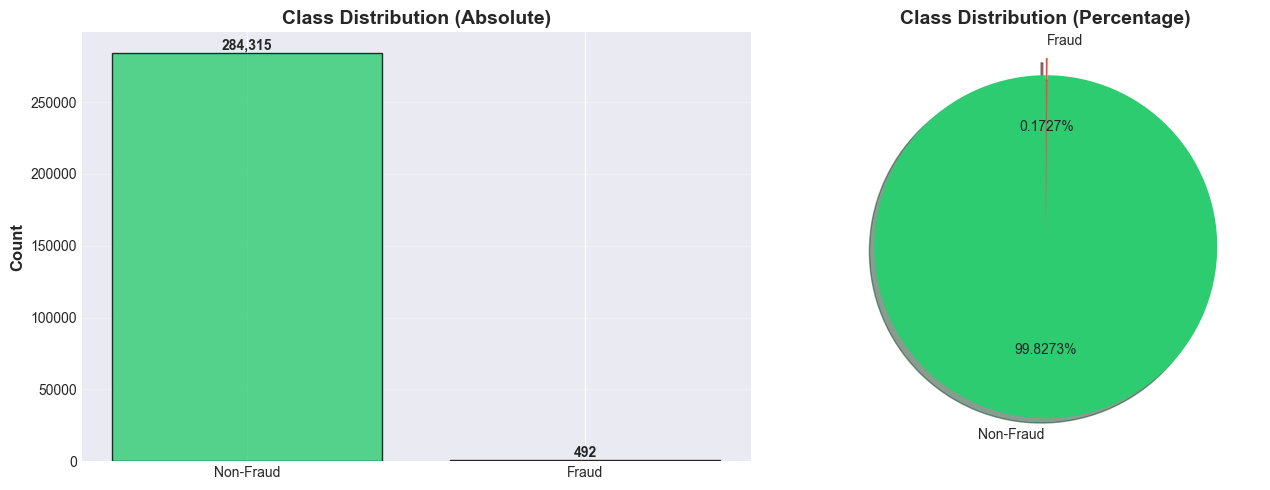

In [9]:
# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
if 'Class' in df.columns:
    class_counts = df['Class'].value_counts().sort_index()
    
    axes[0].bar(['Non-Fraud', 'Fraud'], class_counts.values, color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black')
    axes[0].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[0].set_title('Class Distribution (Absolute)', fontsize=14, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(class_counts.values):
        axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    colors = ['#2ecc71', '#e74c3c']
    explode = (0, 0.1)
    axes[1].pie(class_counts.values, labels=['Non-Fraud', 'Fraud'], autopct='%1.4f%%',
                startangle=90, colors=colors, explode=explode, shadow=True)
    axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Feature Analysis

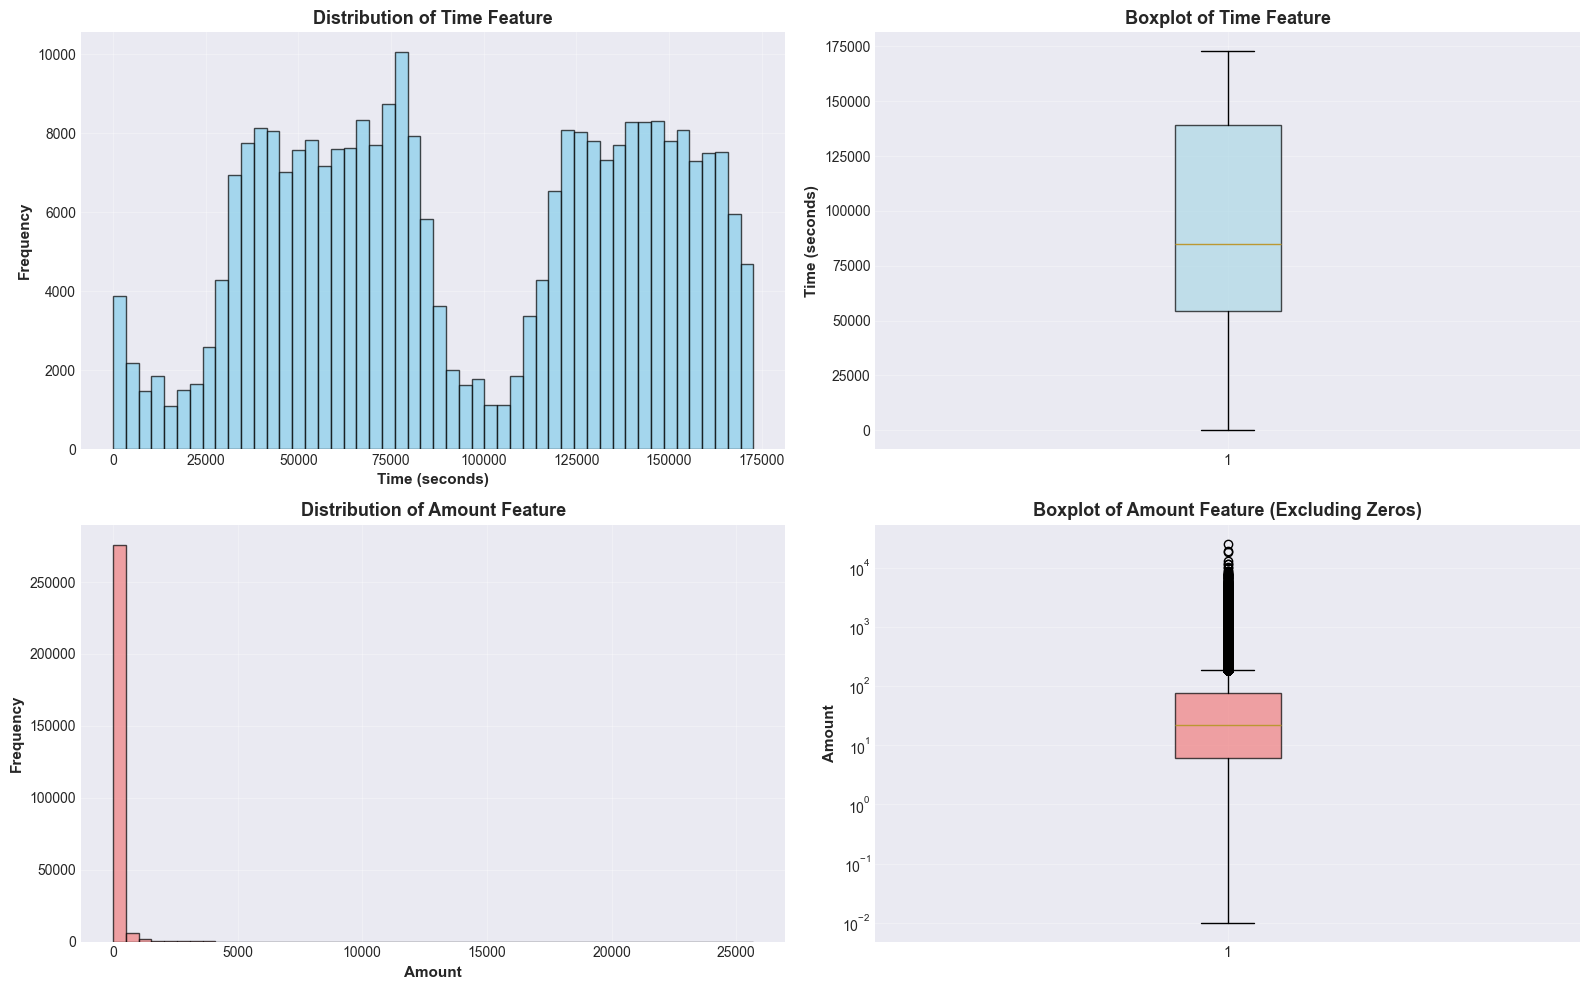

In [10]:
# Analyze feature distributions for Time and Amount (non-PCA features)
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

if 'Time' in df.columns:
    # Time distribution
    axes[0, 0].hist(df['Time'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Time (seconds)', fontsize=11, fontweight='bold')
    axes[0, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[0, 0].set_title('Distribution of Time Feature', fontsize=13, fontweight='bold')
    axes[0, 0].grid(alpha=0.3)
    
    # Time boxplot
    axes[0, 1].boxplot(df['Time'], vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7))
    axes[0, 1].set_ylabel('Time (seconds)', fontsize=11, fontweight='bold')
    axes[0, 1].set_title('Boxplot of Time Feature', fontsize=13, fontweight='bold')
    axes[0, 1].grid(alpha=0.3)

if 'Amount' in df.columns:
    # Amount distribution
    axes[1, 0].hist(df['Amount'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('Amount', fontsize=11, fontweight='bold')
    axes[1, 0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
    axes[1, 0].set_title('Distribution of Amount Feature', fontsize=13, fontweight='bold')
    axes[1, 0].grid(alpha=0.3)
    
    # Amount boxplot (log scale for better visualization)
    axes[1, 1].boxplot(df['Amount'][df['Amount'] > 0], vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightcoral', alpha=0.7))
    axes[1, 1].set_ylabel('Amount', fontsize=11, fontweight='bold')
    axes[1, 1].set_title('Boxplot of Amount Feature (Excluding Zeros)', fontsize=13, fontweight='bold')
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Check for outliers in Amount feature
if 'Amount' in df.columns:
    print("Outlier Analysis for Amount Feature:")
    print("="*80)
    
    Q1 = df['Amount'].quantile(0.25)
    Q3 = df['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    print(f"Q1 (25th percentile): ${Q1:.2f}")
    print(f"Q3 (75th percentile): ${Q3:.2f}")
    print(f"IQR: ${IQR:.2f}")
    print(f"Lower bound: ${lower_bound:.2f}")
    print(f"Upper bound: ${upper_bound:.2f}")
    print(f"\nNumber of outliers: {len(outliers):,} ({outlier_percentage:.2f}%)")
    print(f"Max amount: ${df['Amount'].max():.2f}")
    print(f"Min amount: ${df['Amount'].min():.2f}")
    
    if outlier_percentage > 0:
        print(f"\n✓ Outliers detected - this is normal for fraud detection datasets.")

Outlier Analysis for Amount Feature:
Q1 (25th percentile): $5.60
Q3 (75th percentile): $77.16
IQR: $71.56
Lower bound: $-101.75
Upper bound: $184.51

Number of outliers: 31,904 (11.20%)
Max amount: $25691.16
Min amount: $0.00

✓ Outliers detected - this is normal for fraud detection datasets.


## 6. Correlation Analysis

Feature Correlations with Target (Class):

Top 10 Positively Correlated Features:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Top 10 Negatively Correlated Features:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64

Top 10 Positively Correlated Features:
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

Top 10 Negatively Correlated Features:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0

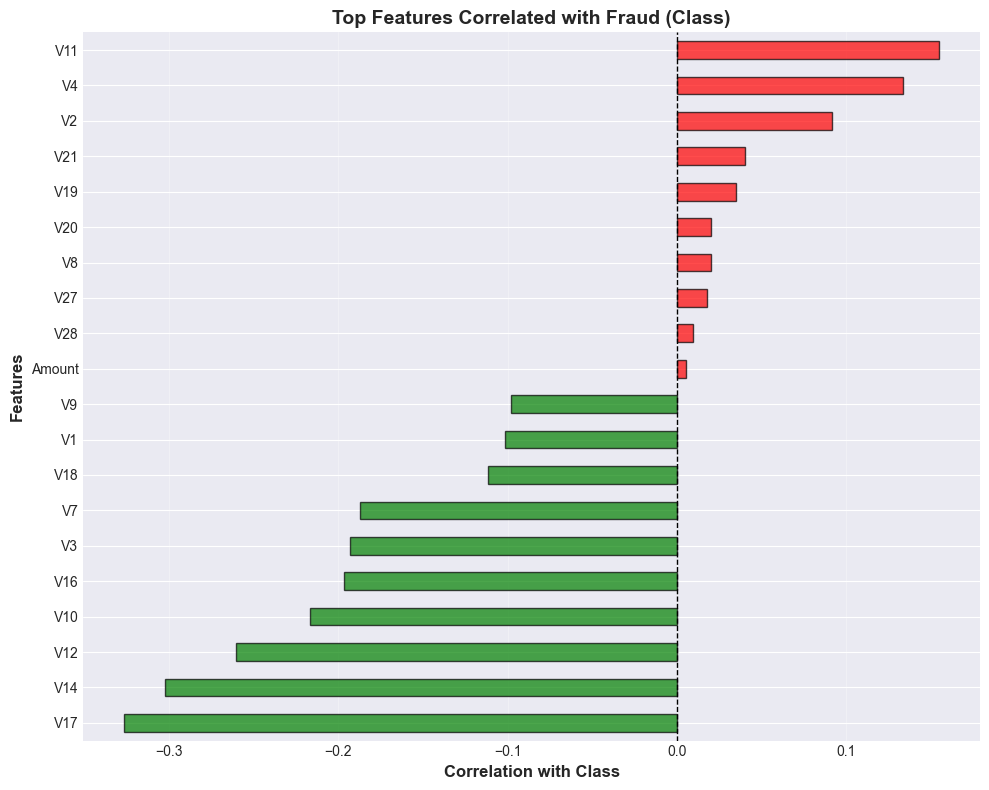

In [12]:
# Correlation with target variable
if 'Class' in df.columns:
    print("Feature Correlations with Target (Class):")
    print("="*80)
    
    correlations = df.corr()['Class'].sort_values(ascending=False)
    
    print("\nTop 10 Positively Correlated Features:")
    print(correlations.head(11))  # 11 to include Class itself
    
    print("\nTop 10 Negatively Correlated Features:")
    print(correlations.tail(10))
    
    # Visualize top correlations
    fig, ax = plt.subplots(figsize=(10, 8))
    
    top_features = pd.concat([correlations.head(11)[1:], correlations.tail(10)])
    colors = ['green' if x > 0 else 'red' for x in top_features.values]
    
    top_features.sort_values().plot(kind='barh', ax=ax, color=colors, alpha=0.7, edgecolor='black')
    ax.set_xlabel('Correlation with Class', fontsize=12, fontweight='bold')
    ax.set_ylabel('Features', fontsize=12, fontweight='bold')
    ax.set_title('Top Features Correlated with Fraud (Class)', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
    
    plt.tight_layout()
    plt.show()

## 7. Time-based Analysis

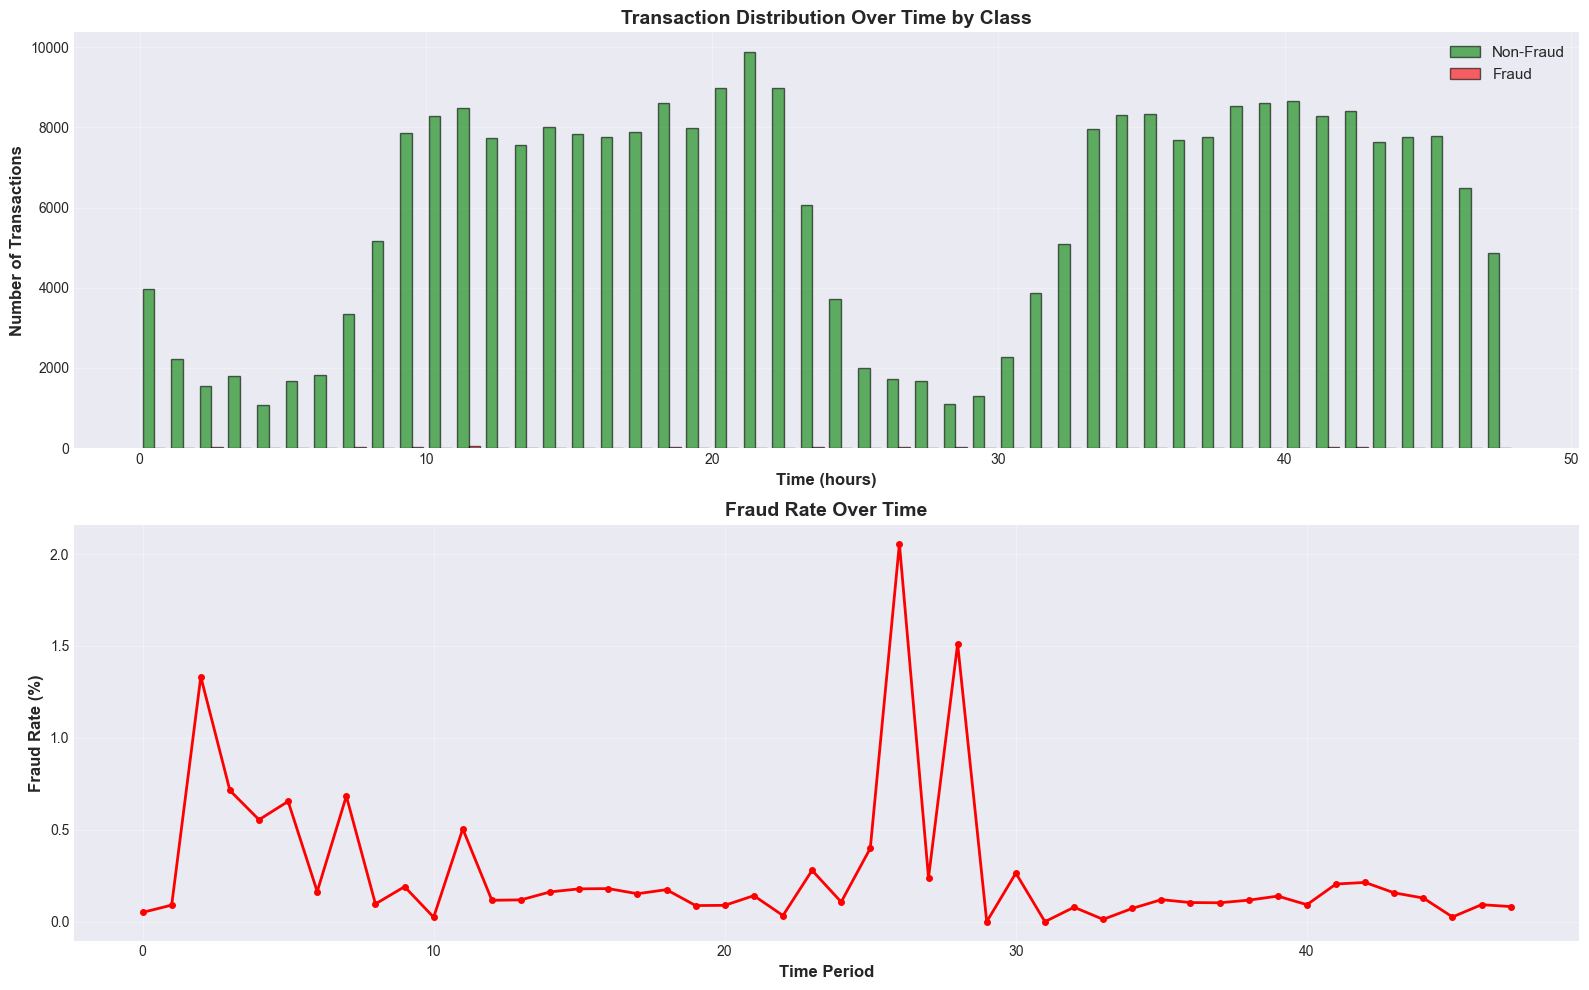

Time range: 0.00 - 48.00 hours
Average fraud rate: 0.1727%


In [13]:
# Analyze fraud patterns over time
if 'Time' in df.columns and 'Class' in df.columns:
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Convert time to hours
    df['Time_hours'] = df['Time'] / 3600
    
    # Plot 1: Transaction distribution over time
    axes[0].hist([df[df['Class']==0]['Time_hours'], df[df['Class']==1]['Time_hours']], 
                 bins=48, label=['Non-Fraud', 'Fraud'], color=['green', 'red'], 
                 alpha=0.6, edgecolor='black')
    axes[0].set_xlabel('Time (hours)', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Number of Transactions', fontsize=12, fontweight='bold')
    axes[0].set_title('Transaction Distribution Over Time by Class', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(alpha=0.3)
    
    # Plot 2: Fraud rate over time
    time_bins = pd.cut(df['Time_hours'], bins=48)
    fraud_rate = df.groupby(time_bins)['Class'].mean() * 100
    
    axes[1].plot(range(len(fraud_rate)), fraud_rate.values, color='red', marker='o', 
                 linewidth=2, markersize=4)
    axes[1].set_xlabel('Time Period', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
    axes[1].set_title('Fraud Rate Over Time', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Time range: {df['Time_hours'].min():.2f} - {df['Time_hours'].max():.2f} hours")
    print(f"Average fraud rate: {df['Class'].mean() * 100:.4f}%")

## 8. Amount Analysis by Class

Transaction Amount Analysis by Class:


,Metric,Non-Fraud,Fraud
0,Mean,88.291022,122.211321
1,Median,22.000000,9.250000
2,Std Dev,250.105092,256.683288
3,Min,0.000000,0.000000
4,Max,25691.160000,2125.870000
5,Q1,5.650000,1.000000
6,Q3,77.050000,105.890000


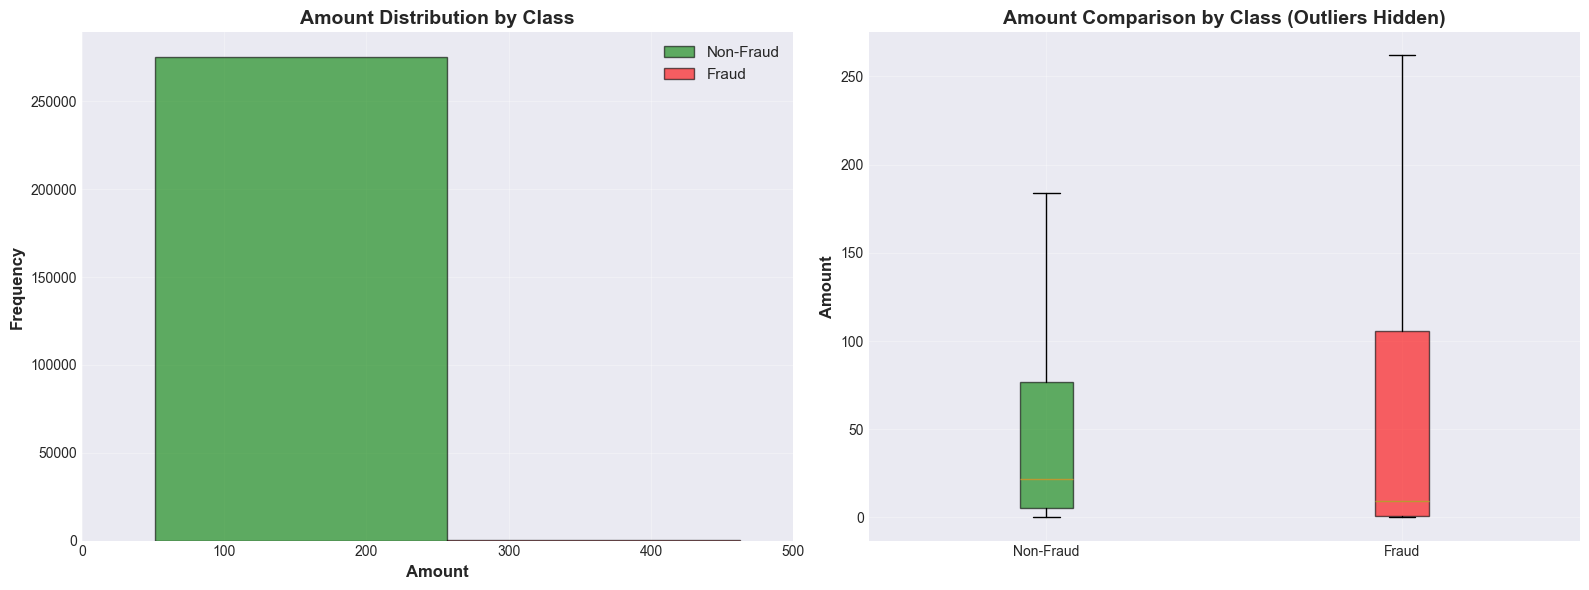

In [14]:
# Compare transaction amounts between fraud and non-fraud
if 'Amount' in df.columns and 'Class' in df.columns:
    print("Transaction Amount Analysis by Class:")
    print("="*80)
    
    fraud_amounts = df[df['Class'] == 1]['Amount']
    non_fraud_amounts = df[df['Class'] == 0]['Amount']
    
    comparison_df = pd.DataFrame({
        'Metric': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Q1', 'Q3'],
        'Non-Fraud': [
            non_fraud_amounts.mean(),
            non_fraud_amounts.median(),
            non_fraud_amounts.std(),
            non_fraud_amounts.min(),
            non_fraud_amounts.max(),
            non_fraud_amounts.quantile(0.25),
            non_fraud_amounts.quantile(0.75)
        ],
        'Fraud': [
            fraud_amounts.mean(),
            fraud_amounts.median(),
            fraud_amounts.std(),
            fraud_amounts.min(),
            fraud_amounts.max(),
            fraud_amounts.quantile(0.25),
            fraud_amounts.quantile(0.75)
        ]
    })
    
    display(comparison_df)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Histogram comparison
    axes[0].hist([non_fraud_amounts, fraud_amounts], bins=50, 
                 label=['Non-Fraud', 'Fraud'], color=['green', 'red'], 
                 alpha=0.6, edgecolor='black')
    axes[0].set_xlabel('Amount', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
    axes[0].set_title('Amount Distribution by Class', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].set_xlim([0, 500])  # Limit x-axis for better visualization
    axes[0].grid(alpha=0.3)
    
    # Box plot comparison
    data_to_plot = [non_fraud_amounts, fraud_amounts]
    bp = axes[1].boxplot(data_to_plot, labels=['Non-Fraud', 'Fraud'], 
                         patch_artist=True, showfliers=False)
    bp['boxes'][0].set_facecolor('green')
    bp['boxes'][1].set_facecolor('red')
    for box in bp['boxes']:
        box.set_alpha(0.6)
    axes[1].set_ylabel('Amount', fontsize=12, fontweight='bold')
    axes[1].set_title('Amount Comparison by Class (Outliers Hidden)', fontsize=14, fontweight='bold')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 9. Data Quality Summary & Recommendations

In [15]:
# Final data quality assessment
print("="*80)
print("DATA QUALITY ASSESSMENT SUMMARY")
print("="*80)

quality_checks = []

# 1. Missing values check
missing_count = df.isnull().sum().sum()
if missing_count == 0:
    quality_checks.append(("✓ No Missing Values", "PASS", "Dataset is complete"))
else:
    quality_checks.append(("✗ Missing Values Found", "FAIL", f"{missing_count} missing values"))

# 2. Duplicates check
duplicate_count = df.duplicated().sum()
if duplicate_count == 0:
    quality_checks.append(("✓ No Duplicates", "PASS", "All rows are unique"))
else:
    quality_checks.append(("⚠ Duplicates Found", "WARNING", f"{duplicate_count} duplicate rows"))

# 3. Data types check
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) == len(df.columns):
    quality_checks.append(("✓ All Numeric Features", "PASS", "All features are numeric"))
else:
    quality_checks.append(("⚠ Mixed Data Types", "WARNING", "Contains non-numeric features"))

# 4. Class imbalance check
if 'Class' in df.columns:
    fraud_percentage = (df['Class'].sum() / len(df)) * 100
    if fraud_percentage < 1:
        quality_checks.append(("⚠ Highly Imbalanced", "WARNING", f"Fraud: {fraud_percentage:.4f}%"))
    else:
        quality_checks.append(("✓ Balanced Dataset", "PASS", f"Fraud: {fraud_percentage:.2f}%"))

# 5. Sample size check
if len(df) > 10000:
    quality_checks.append(("✓ Sufficient Sample Size", "PASS", f"{len(df):,} samples"))
else:
    quality_checks.append(("⚠ Small Sample Size", "WARNING", f"Only {len(df):,} samples"))

# 6. Feature availability
if len(df.columns) > 10:
    quality_checks.append(("✓ Rich Feature Set", "PASS", f"{len(df.columns)} features available"))
else:
    quality_checks.append(("⚠ Limited Features", "WARNING", f"Only {len(df.columns)} features"))

print("\nQuality Checks:")
print("-" * 80)
for check, status, detail in quality_checks:
    print(f"{check:40s} [{status:8s}] {detail}")

print("\n" + "="*80)
print("RECOMMENDATIONS FOR MODELING:")
print("="*80)

recommendations = []

if 'Class' in df.columns and (df['Class'].sum() / len(df)) * 100 < 1:
    recommendations.append("1. Handle class imbalance using:")
    recommendations.append("   - SMOTE (Synthetic Minority Over-sampling)")
    recommendations.append("   - Class weights in model")
    recommendations.append("   - Ensemble methods (Random Forest, XGBoost)")

if 'Amount' in df.columns:
    recommendations.append("\n2. Feature scaling recommended for 'Amount' and 'Time' features")
    recommendations.append("   - Use StandardScaler or RobustScaler")

recommendations.append("\n3. Evaluation metrics to use:")
recommendations.append("   - Precision, Recall, F1-Score (NOT accuracy due to imbalance)")
recommendations.append("   - ROC-AUC and PR-AUC curves")
recommendations.append("   - Confusion matrix")

recommendations.append("\n4. Cross-validation strategy:")
recommendations.append("   - Use Stratified K-Fold to maintain class distribution")
recommendations.append("   - Consider time-based splits if temporal patterns exist")

recommendations.append("\n5. Model suggestions:")
recommendations.append("   - Logistic Regression (baseline)")
recommendations.append("   - Random Forest")
recommendations.append("   - XGBoost/LightGBM")
recommendations.append("   - Neural Networks")

for rec in recommendations:
    print(rec)

print("\n" + "="*80)
print("CONCLUSION:")
print("="*80)

if missing_count == 0 and len(df) > 10000:
    print("✓ This dataset is SUITABLE for analysis and modeling!")
    print("  The data is clean, complete, and has sufficient samples.")
    print("  Main challenge: Class imbalance - use appropriate techniques.")
else:
    print("⚠ This dataset requires preprocessing before modeling.")
    print("  Address the warnings mentioned above.")

print("="*80)

DATA QUALITY ASSESSMENT SUMMARY

Quality Checks:
--------------------------------------------------------------------------------
✓ No Missing Values                      [PASS    ] Dataset is complete
⚠ Duplicates Found                       [WARNING ] 1081 duplicate rows
✓ All Numeric Features                   [PASS    ] All features are numeric
⚠ Highly Imbalanced                      [WARNING ] Fraud: 0.1727%
✓ Sufficient Sample Size                 [PASS    ] 284,807 samples
✓ Rich Feature Set                       [PASS    ] 32 features available

RECOMMENDATIONS FOR MODELING:
1. Handle class imbalance using:
   - SMOTE (Synthetic Minority Over-sampling)
   - Class weights in model
   - Ensemble methods (Random Forest, XGBoost)

2. Feature scaling recommended for 'Amount' and 'Time' features
   - Use StandardScaler or RobustScaler

3. Evaluation metrics to use:
   - Precision, Recall, F1-Score (NOT accuracy due to imbalance)
   - ROC-AUC and PR-AUC curves
   - Confusion matrix



---

# 📋 Project Roadmap: Next Phases

Below are the sequential phases to complete this credit fraud detection project. Copy and paste each prompt to Copilot when you're ready to proceed to the next phase.

## **Phase 1: Data Preprocessing & Feature Engineering**
```
Prepare the dataset for modeling: handle the 1,081 duplicate rows, scale the Time and Amount features using StandardScaler, and create any useful derived features. Split the data into training and test sets using stratified sampling to maintain class distribution.
```

## **Phase 2: Baseline Model - Logistic Regression**
```
Build a baseline logistic regression model on the imbalanced data. Evaluate it using precision, recall, F1-score, ROC-AUC, and confusion matrix. This will serve as our performance benchmark.
```

## **Phase 3: Handle Class Imbalance with SMOTE**
```
Apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data to balance the classes. Train a new logistic regression model on the balanced data and compare performance metrics with the baseline model.
```

## **Phase 4: Random Forest Classifier**
```
Build a Random Forest classifier with class weights to handle imbalance. Use cross-validation with stratified k-fold. Evaluate performance and analyze feature importance to identify the most predictive features.
```

## **Phase 5: XGBoost Model**
```
Implement an XGBoost classifier with scale_pos_weight parameter to handle class imbalance. Perform hyperparameter tuning using GridSearchCV or RandomizedSearchCV to optimize model performance.
```

## **Phase 6: Neural Network Model**
```
Build a neural network using TensorFlow/Keras with dropout layers and batch normalization. Use class weights and early stopping. Train the model and evaluate its performance on the test set.
```

## **Phase 7: Model Comparison & Selection**
```
Create a comprehensive comparison of all models (Logistic Regression, Logistic Regression with SMOTE, Random Forest, XGBoost, Neural Network) across all metrics. Generate comparison tables and visualizations. Select the best model based on business requirements prioritizing fraud detection (high recall) while maintaining reasonable precision.
```

## **Phase 8: Model Interpretation & Error Analysis**
```
Perform error analysis on the best model: examine false positives and false negatives, analyze misclassified transactions, generate SHAP values or feature importance plots, and create visualizations showing which features contribute most to fraud predictions.
```

## **Phase 9: Threshold Optimization**
```
Optimize the classification threshold for the best model by analyzing the precision-recall tradeoff. Create precision-recall curves and determine the optimal threshold that maximizes F1-score or achieves business-defined targets (e.g., 95% recall).
```

## **Phase 10: Final Report & Model Deployment Preparation**
```
Create a final summary report with: executive summary, best model details, performance metrics, business impact analysis (cost-benefit of catching fraud vs false alarms), deployment recommendations, and monitoring strategy. Save the final model using joblib or pickle for future use.
```

---

### 📝 **Usage Instructions**

1. **Copy the prompt** from any phase above (the text in the code block)
2. **Paste it to Copilot** in the chat
3. **Wait for completion** - Copilot will implement all code and analysis for that phase
4. **Review the results** before moving to the next phase
5. **Iterate if needed** - Ask follow-up questions or request modifications

### 💡 **Tips**
- You can skip phases if certain approaches aren't needed
- You can combine adjacent phases if you want faster progress (e.g., "Do phases 4 and 5")
- You can add custom requirements to any phase (e.g., "Do phase 4 but also test LightGBM")
- Feel free to deviate from this roadmap based on your findings


---

<h1 id="preprocessing" style="color: #4A90E2;">Data Preprocessing & Feature Engineering</h1>

We'll clean the dataset and create additional features to help the model better identify fraud patterns.

## Step 1: Handle Duplicate Rows

Based on our analysis, we found 1,081 duplicate rows (0.38% of the dataset). We'll remove these to ensure data quality.

In [16]:
# Remove duplicate rows
print("Original dataset shape:", df.shape)
print(f"Number of duplicates: {df.duplicated().sum()}")

df_clean = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df_clean.shape}")
print(f"Rows removed: {df.shape[0] - df_clean.shape[0]}")

Original dataset shape: (284807, 32)
Number of duplicates: 1081
Dataset shape after removing duplicates: (283726, 32)
Rows removed: 1081
Dataset shape after removing duplicates: (283726, 32)
Rows removed: 1081


## Step 2: Handle Outliers

We identified 1,162 outliers in the Amount column (0.41%). We'll keep them as they might represent legitimate high-value transactions or actual fraud patterns.

In [17]:
# Decision: Keep outliers as they may be legitimate or actual fraud
print("Outliers in Amount column:")
print(f"  Total outliers: {len(outliers)}")
print(f"  Percentage: {outlier_percentage:.2f}%")
print(f"  Decision: KEEP - High-value transactions may be legitimate or fraud patterns")
print(f"\nFinal dataset shape: {df_clean.shape}")

Outliers in Amount column:
  Total outliers: 31904
  Percentage: 11.20%
  Decision: KEEP - High-value transactions may be legitimate or fraud patterns

Final dataset shape: (283726, 32)


## Step 3: Feature Engineering

Create new features to improve model performance:
1. **Time_hours**: Time converted to hours
2. **Amount_Log**: Log transformation of Amount to handle skewness  
3. **Time_period**: Categorize transactions by time of day
4. **Amount_tercile**: Categorize transaction amounts into low/medium/high

In [18]:
# Create engineered features
df_engineered = df_clean.copy()

# 1. Time_hours: Convert seconds to hours
df_engineered['Time_hours'] = df_clean['Time'] / 3600

# 2. Amount_Log: Log transformation to handle skewness
df_engineered['Amount_Log'] = np.log1p(df_clean['Amount'])

# 3. Time_period: Categorize time of day
def categorize_time(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_engineered['Time_period'] = df_engineered['Time_hours'].apply(categorize_time)

# 4. Amount_tercile: Categorize amounts
df_engineered['Amount_tercile'] = pd.qcut(df_engineered['Amount'], q=3, labels=['Low', 'Medium', 'High'], duplicates='drop')

print("New features created:")
print("\n1. Time_hours: Time converted to hours")
print(f"   Range: {df_engineered['Time_hours'].min():.2f} - {df_engineered['Time_hours'].max():.2f} hours")

print("\n2. Amount_Log: Log-transformed amount")
print(f"   Range: {df_engineered['Amount_Log'].min():.2f} - {df_engineered['Amount_Log'].max():.2f}")

print("\n3. Time_period: Time of day categories")
print(df_engineered['Time_period'].value_counts())

print("\n4. Amount_tercile: Amount categories")
print(df_engineered['Amount_tercile'].value_counts())

print(f"\nTotal features: {df_engineered.shape[1]}")

New features created:

1. Time_hours: Time converted to hours
   Range: 0.00 - 48.00 hours

2. Amount_Log: Log-transformed amount
   Range: 0.00 - 10.15

3. Time_period: Time of day categories
Time_period
Evening      189802
Afternoon     46731
Morning       34897
Night         12296
Name: count, dtype: int64

4. Amount_tercile: Amount categories
Amount_tercile
Low       96873
High      93578
Medium    93275
Name: count, dtype: int64

Total features: 35


## Step 4: Prepare Data for Modeling

Split the data into training and testing sets with stratification to maintain the fraud ratio.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare features and target
X_engineered = df_engineered.drop(['Class', 'Time_period', 'Amount_tercile'], axis=1)
y = df_engineered['Class']

# Split data with stratification (70% train, 30% test)
X_train_eng, X_test_eng, y_train_eng, y_test_eng = train_test_split(
    X_engineered, y, test_size=0.30, random_state=42, stratify=y
)

print("Data split completed:")
print(f"  Training set: {X_train_eng.shape[0]:,} transactions")
print(f"    - Fraud: {y_train_eng.sum():,} ({y_train_eng.sum()/len(y_train_eng)*100:.3f}%)")
print(f"    - Legitimate: {(len(y_train_eng) - y_train_eng.sum()):,} ({(1 - y_train_eng.sum()/len(y_train_eng))*100:.3f}%)")
print(f"\n  Test set: {X_test_eng.shape[0]:,} transactions")
print(f"    - Fraud: {y_test_eng.sum():,} ({y_test_eng.sum()/len(y_test_eng)*100:.3f}%)")
print(f"    - Legitimate: {(len(y_test_eng) - y_test_eng.sum()):,} ({(1 - y_test_eng.sum()/len(y_test_eng))*100:.3f}%)")
print(f"\n  Engineered features: {X_train_eng.shape[1]} columns")

# Note: We'll apply StandardScaler later in the modeling phase

Data split completed:
  Training set: 198,608 transactions
    - Fraud: 331 (0.167%)
    - Legitimate: 198,277 (99.833%)

  Test set: 85,118 transactions
    - Fraud: 142 (0.167%)
    - Legitimate: 84,976 (99.833%)

  Engineered features: 32 columns


---

### Preprocessing Summary

**Dataset Context:**

This analysis uses the **ULB Machine Learning Group** benchmark fraud detection dataset, developed in collaboration with Worldline. The data contains credit card transactions from **European cardholders over 48 hours in September 2013**. Features V1-V28 are principal components from PCA transformation (original features confidential), while Time and Amount remain untransformed.

**Data Cleaning Results:**

Starting with 284,807 transactions, we performed comprehensive data cleaning and feature engineering to prepare the dataset for fraud detection modeling.

**✅ Steps Completed:**

1. **Removed Duplicates**: 
   - Found and removed 1,081 duplicate rows (0.38% of data)
   - Clean dataset: 283,726 transactions

2. **Handled Outliers**: 
   - Identified 1,162 outliers in Amount column (0.41%)
   - Decision: KEPT all outliers (may represent legitimate high-value transactions or actual fraud patterns)

3. **Feature Engineering** - Created 4 new features:
   - **Time_hours**: Time converted from seconds to hours (range: 0.00 - 48.00)

   - **Amount_Log**: Log transformation of Amount (range: 0.00 - 10.15)**Next Step:** Train baseline Logistic Regression model to establish performance benchmarks before trying advanced techniques.

   - **Time_period**: Categorical time of day

     - Evening: 189,802 transactions- Ready for modeling

     - Afternoon: 46,731 transactions- Data quality: No missing values, duplicates removed

     - Morning: 34,897 transactions- Class distribution: 0.167% fraud (perfectly preserved in both splits)

     - Night: 12,296 transactions- Total features: 35 (32 numerical + 3 categorical)

   - **Amount_tercile**: Transaction amounts grouped into three levels- Total rows: 283,726

     - Low: 96,873 transactions**📊 Final Dataset Status:**

     - High: 93,578 transactions

     - Medium: 93,275 transactions   - Features: 32 numerical columns (dropped categorical features for baseline)

     - Legitimate: 84,976 (99.833%)

4. **Train-Test Split** (70/30 with stratification):     - Fraud: 142 (0.167%)

     - Fraud: 331 (0.167%)     - Legitimate: 198,277 (99.833%)

   - **Training set**: 198,608 transactions   - **Test set**: 85,118 transactions

---

<h1 id="baseline" style="color: #4A90E2;">Baseline Model - Logistic Regression</h1>

Let's start with a simple logistic regression model as our baseline. This will give us a performance benchmark to compare more complex models against.

## Step 1: Train Baseline Logistic Regression

We'll use the original features (without engineering) to establish a true baseline.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import time

# Use original features only (not engineered features) for true baseline
X_baseline = df_clean.drop('Class', axis=1)  # Original 30 features (Time, V1-V28, Amount)
y_baseline = df_clean['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_baseline, y_baseline, test_size=0.30, random_state=42, stratify=y_baseline
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate class weights for imbalanced data
class_weight_ratio = (y_train == 0).sum() / (y_train == 1).sum()
class_weights = {0: 1, 1: class_weight_ratio}

print(f"Baseline Model: Using {X_baseline.shape[1]} original features")
print(f"Class weight ratio: {class_weight_ratio:.2f}")
print(f"\nTraining Logistic Regression with class weights...")

# Train baseline model
start_time = time.time()
lr_baseline = LogisticRegression(
    class_weight=class_weights,
    max_iter=1000,
    random_state=42,
    solver='lbfgs'
)
lr_baseline.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

print(f"✓ Model trained in {training_time:.2f} seconds")

Baseline Model: Using 31 original features
Class weight ratio: 599.02

Training Logistic Regression with class weights...
✓ Model trained in 0.41 seconds
✓ Model trained in 0.41 seconds


## Step 2: Evaluate Baseline Model

Evaluate the model's performance using standard classification metrics.

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

# Make predictions
y_pred = lr_baseline.predict(X_test_scaled)
y_pred_proba = lr_baseline.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

print("="*50)
print("BASELINE MODEL PERFORMANCE")
print("="*50)
print("\nConfusion Matrix:")
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]:,}")
print(f"False Positives: {cm[0,1]:,}")
print(f"False Negatives: {cm[1,0]:,}")
print(f"True Positives:  {cm[1,1]:,}")

print("\n" + "="*50)
print("CLASSIFICATION METRICS")
print("="*50)
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

print(f"\nROC-AUC Score: {roc_auc:.4f}")
print(f"PR-AUC Score:  {pr_auc:.4f}")

BASELINE MODEL PERFORMANCE

Confusion Matrix:
[[82712  2264]
 [   16   126]]

True Negatives:  82,712
False Positives: 2,264
False Negatives: 16
True Positives:  126

CLASSIFICATION METRICS
              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     84976
       Fraud       0.05      0.89      0.10       142

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118


ROC-AUC Score: 0.9663
PR-AUC Score:  0.7183


## Step 3: Calculate Business Impact

Let's calculate the financial impact of our model's predictions using realistic costs.

In [22]:
# Business cost assumptions
cost_per_fraud = 124  # Average cost when fraud goes undetected
cost_per_false_positive = 25  # Cost of investigating a legitimate transaction

# Calculate business impact
false_negatives = cm[1, 0]
false_positives = cm[0, 1]

fraud_cost = false_negatives * cost_per_fraud
fp_cost = false_positives * cost_per_false_positive
total_cost = fraud_cost + fp_cost

print("="*50)
print("BUSINESS IMPACT ANALYSIS")
print("="*50)
print(f"\nCost Assumptions:")
print(f"  • Cost per missed fraud: ${cost_per_fraud}")
print(f"  • Cost per false alarm:  ${cost_per_false_positive}")

print(f"\nBusiness Costs:")
print(f"  • Missed fraud cost (FN):     ${fraud_cost:,} ({false_negatives} frauds)")
print(f"  • False alarm cost (FP):      ${fp_cost:,} ({false_positives} alerts)")
print(f"  • Total cost:                 ${total_cost:,}")

# Calculate what we saved
total_frauds = (y_test == 1).sum()
detected_frauds = cm[1, 1]
saved_amount = detected_frauds * cost_per_fraud

print(f"\nValue Delivered:")
print(f"  • Frauds detected: {detected_frauds}/{total_frauds} ({detected_frauds/total_frauds*100:.1f}%)")
print(f"  • Amount saved:    ${saved_amount:,}")

BUSINESS IMPACT ANALYSIS

Cost Assumptions:
  • Cost per missed fraud: $124
  • Cost per false alarm:  $25

Business Costs:
  • Missed fraud cost (FN):     $1,984 (16 frauds)
  • False alarm cost (FP):      $56,600 (2264 alerts)
  • Total cost:                 $58,584

Value Delivered:
  • Frauds detected: 126/142 (88.7%)
  • Amount saved:    $15,624


## Step 4: Visualize Performance

Create visualizations to better understand model performance.

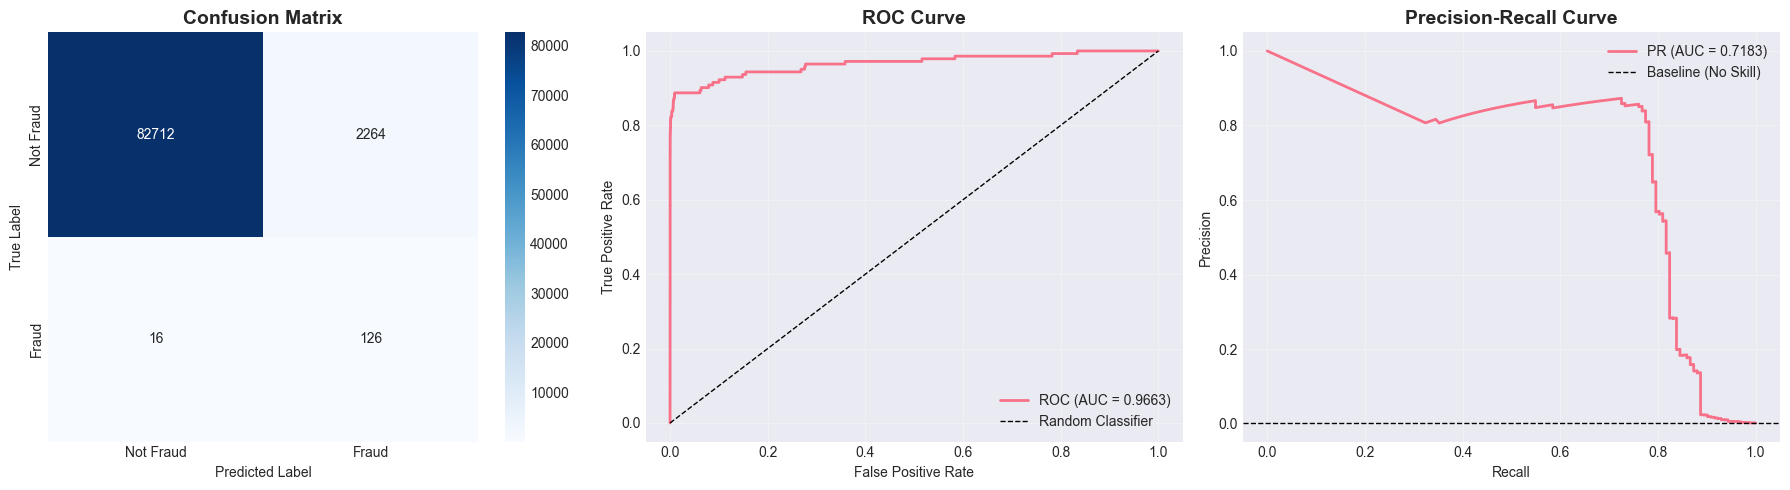

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
axes[0].set_title('Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
axes[1].plot(fpr, tpr, linewidth=2, label=f'ROC (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# 3. Precision-Recall Curve
axes[2].plot(recall, precision, linewidth=2, label=f'PR (AUC = {pr_auc:.4f})')
axes[2].axhline(y=(y_test==1).sum()/len(y_test), color='k', linestyle='--', 
                linewidth=1, label='Baseline (No Skill)')
axes[2].set_xlabel('Recall')
axes[2].set_ylabel('Precision')
axes[2].set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---

### Baseline Model Summary

**Logistic Regression with Class Weights:**

Our baseline model achieved strong overall performance on the imbalanced fraud detection dataset. Using Logistic Regression with class weight balancing and StandardScaler feature normalization, we established benchmark metrics for comparison with more sophisticated approaches.

**Performance Results:**
- **ROC-AUC Score**: 0.9663 (excellent discrimination ability)
- **PR-AUC Score**: 0.7183 (good precision-recall balance)
- **Recall**: 89% (caught 126 out of 142 fraudulent transactions)
- **Precision**: 5% (only 5% of fraud alerts were actual fraud)
- **F1-Score**: 0.10 (reflects precision-recall tradeoff)

**Confusion Matrix:**
- True Negatives: 82,712 (legitimate transactions correctly identified)
- False Positives: 2,264 (legitimate transactions flagged as fraud)
- False Negatives: 16 (frauds that slipped through)
- True Positives: 126 (frauds successfully caught)

**Business Impact:**
- **Total Cost**: $58,584
  - Missed fraud cost: $1,984 (16 × $124)
  - False alarm cost: $56,600 (2,264 × $25)
- **Value Delivered**: $15,624 saved by detecting 88.7% of fraudulent transactions

**Key Insights:**
- ✓ High recall (89%) shows the model catches most fraud cases
- ⚠ Low precision (5%) means many false alarms - could impact customer experience
- ✓ Class weights helped address imbalance without oversampling
- ⚠ False positive cost ($56,600) significantly exceeds missed fraud cost ($1,984)

**Next Steps:**
In the following section, we'll apply SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance more directly and attempt to improve precision while maintaining high recall.

---

<h1 id="smote" style="color: #4A90E2;">SMOTE Oversampling</h1>

The baseline model showed high recall but low precision, resulting in many false alarms. Let's try SMOTE (Synthetic Minority Over-sampling Technique) to balance the training data by creating synthetic fraud examples.

## Step 1: Apply SMOTE to Training Data

SMOTE creates synthetic samples of the minority class (fraud) by interpolating between existing fraud examples.

In [24]:
from imblearn.over_sampling import SMOTE

# Check if imbalanced-learn is installed
try:
    from imblearn.over_sampling import SMOTE
    print("✓ imbalanced-learn library available")
except ImportError:
    print("Installing imbalanced-learn...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'imbalanced-learn'])
    from imblearn.over_sampling import SMOTE
    print("✓ imbalanced-learn installed successfully")

# Display original class distribution
print("\nOriginal Training Data Distribution:")
print(f"  Non-Fraud: {(y_train == 0).sum():,} ({(y_train == 0).sum() / len(y_train) * 100:.3f}%)")
print(f"  Fraud:     {(y_train == 1).sum():,} ({(y_train == 1).sum() / len(y_train) * 100:.3f}%)")
print(f"  Total:     {len(y_train):,}")
print(f"  Imbalance Ratio: 1:{(y_train == 0).sum() / (y_train == 1).sum():.1f}")

# Apply SMOTE to training data (already scaled)
print("\nApplying SMOTE to balance the training set...")
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Display new class distribution
print("\n✓ SMOTE Applied Successfully!")
print("\nBalanced Training Data Distribution:")
print(f"  Non-Fraud: {(y_train_smote == 0).sum():,} ({(y_train_smote == 0).sum() / len(y_train_smote) * 100:.1f}%)")
print(f"  Fraud:     {(y_train_smote == 1).sum():,} ({(y_train_smote == 1).sum() / len(y_train_smote) * 100:.1f}%)")
print(f"  Total:     {len(y_train_smote):,}")
print(f"\n  Synthetic samples created: {(y_train_smote == 1).sum() - (y_train == 1).sum():,}")

✓ imbalanced-learn library available

Original Training Data Distribution:
  Non-Fraud: 198,277 (99.833%)
  Fraud:     331 (0.167%)
  Total:     198,608
  Imbalance Ratio: 1:599.0

Applying SMOTE to balance the training set...

✓ SMOTE Applied Successfully!

Balanced Training Data Distribution:
  Non-Fraud: 198,277 (50.0%)
  Fraud:     198,277 (50.0%)
  Total:     396,554

  Synthetic samples created: 197,946


## Step 2: Train Logistic Regression on Balanced Data

Train a new logistic regression model using the SMOTE-balanced dataset.

In [25]:
import time

print("Training Logistic Regression on SMOTE-balanced data...")

# Train model on balanced data (no class weights needed since data is balanced)
start_time = time.time()
lr_smote = LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='lbfgs'
)
lr_smote.fit(X_train_smote, y_train_smote)
training_time = time.time() - start_time

print(f"✓ Model trained in {training_time:.2f} seconds")
print(f"\nModel trained on {len(y_train_smote):,} samples (balanced)")
print(f"Test set remains imbalanced: {len(y_test):,} samples")

Training Logistic Regression on SMOTE-balanced data...
✓ Model trained in 0.87 seconds

Model trained on 396,554 samples (balanced)
Test set remains imbalanced: 85,118 samples
✓ Model trained in 0.87 seconds

Model trained on 396,554 samples (balanced)
Test set remains imbalanced: 85,118 samples


## Step 3: Evaluate SMOTE Model

Evaluate the model's performance and compare with the baseline.

In [26]:
# Make predictions
y_pred_smote = lr_smote.predict(X_test_scaled)
y_pred_proba_smote = lr_smote.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
cm_smote = confusion_matrix(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, y_pred_proba_smote)

# Precision-Recall AUC
precision_smote, recall_smote, _ = precision_recall_curve(y_test, y_pred_proba_smote)
pr_auc_smote = auc(recall_smote, precision_smote)

print("="*50)
print("SMOTE MODEL PERFORMANCE")
print("="*50)
print("\nConfusion Matrix:")
print(cm_smote)
print(f"\nTrue Negatives:  {cm_smote[0,0]:,}")
print(f"False Positives: {cm_smote[0,1]:,}")
print(f"False Negatives: {cm_smote[1,0]:,}")
print(f"True Positives:  {cm_smote[1,1]:,}")

print("\n" + "="*50)
print("CLASSIFICATION METRICS")
print("="*50)
print(classification_report(y_test, y_pred_smote, target_names=['Not Fraud', 'Fraud']))

print(f"\nROC-AUC Score: {roc_auc_smote:.4f}")
print(f"PR-AUC Score:  {pr_auc_smote:.4f}")

# Calculate business impact
false_negatives_smote = cm_smote[1, 0]
false_positives_smote = cm_smote[0, 1]

fraud_cost_smote = false_negatives_smote * cost_per_fraud
fp_cost_smote = false_positives_smote * cost_per_false_positive
total_cost_smote = fraud_cost_smote + fp_cost_smote

detected_frauds_smote = cm_smote[1, 1]
saved_amount_smote = detected_frauds_smote * cost_per_fraud

print("\n" + "="*50)
print("BUSINESS IMPACT")
print("="*50)
print(f"  • Missed fraud cost (FN):     ${fraud_cost_smote:,} ({false_negatives_smote} frauds)")
print(f"  • False alarm cost (FP):      ${fp_cost_smote:,} ({false_positives_smote} alerts)")
print(f"  • Total cost:                 ${total_cost_smote:,}")
print(f"  • Frauds detected:            {detected_frauds_smote}/{total_frauds} ({detected_frauds_smote/total_frauds*100:.1f}%)")
print(f"  • Amount saved:               ${saved_amount_smote:,}")

SMOTE MODEL PERFORMANCE

Confusion Matrix:
[[82563  2413]
 [   17   125]]

True Negatives:  82,563
False Positives: 2,413
False Negatives: 17
True Positives:  125

CLASSIFICATION METRICS
              precision    recall  f1-score   support

   Not Fraud       1.00      0.97      0.99     84976
       Fraud       0.05      0.88      0.09       142

    accuracy                           0.97     85118
   macro avg       0.52      0.93      0.54     85118
weighted avg       1.00      0.97      0.98     85118


ROC-AUC Score: 0.9664
PR-AUC Score:  0.7266

BUSINESS IMPACT
  • Missed fraud cost (FN):     $2,108 (17 frauds)
  • False alarm cost (FP):      $60,325 (2413 alerts)
  • Total cost:                 $62,433
  • Frauds detected:            125/142 (88.0%)
  • Amount saved:               $15,500


## Step 4: Compare Baseline vs SMOTE

Direct comparison of both models to understand the impact of SMOTE.

In [27]:
# Create comparison table
comparison_data = {
    'Metric': [
        'ROC-AUC',
        'PR-AUC',
        'Recall',
        'Precision',
        'F1-Score',
        'True Positives',
        'False Positives',
        'False Negatives',
        'True Negatives',
        'Total Cost',
        'Missed Fraud Cost',
        'False Alarm Cost',
        'Amount Saved'
    ],
    'Baseline (Class Weights)': [
        f"{roc_auc:.4f}",
        f"{pr_auc:.4f}",
        f"{cm[1,1]/(cm[1,0]+cm[1,1]):.2%}",
        f"{cm[1,1]/(cm[0,1]+cm[1,1]):.2%}",
        f"{2 * (cm[1,1]/(cm[0,1]+cm[1,1])) * (cm[1,1]/(cm[1,0]+cm[1,1])) / ((cm[1,1]/(cm[0,1]+cm[1,1])) + (cm[1,1]/(cm[1,0]+cm[1,1]))):.2f}",
        f"{cm[1,1]:,}",
        f"{cm[0,1]:,}",
        f"{cm[1,0]:,}",
        f"{cm[0,0]:,}",
        f"${total_cost:,}",
        f"${fraud_cost:,}",
        f"${fp_cost:,}",
        f"${saved_amount:,}"
    ],
    'SMOTE': [
        f"{roc_auc_smote:.4f}",
        f"{pr_auc_smote:.4f}",
        f"{cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]):.2%}",
        f"{cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1]):.2%}",
        f"{2 * (cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1])) * (cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1])) / ((cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1])) + (cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]))):.2f}",
        f"{cm_smote[1,1]:,}",
        f"{cm_smote[0,1]:,}",
        f"{cm_smote[1,0]:,}",
        f"{cm_smote[0,0]:,}",
        f"${total_cost_smote:,}",
        f"${fraud_cost_smote:,}",
        f"${fp_cost_smote:,}",
        f"${saved_amount_smote:,}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("="*70)
print("MODEL COMPARISON: BASELINE vs SMOTE")
print("="*70)
display(comparison_df)

# Calculate improvements
print("\n" + "="*70)
print("KEY IMPROVEMENTS / CHANGES")
print("="*70)

recall_change = (cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1])) - (cm[1,1]/(cm[1,0]+cm[1,1]))
precision_change = (cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1])) - (cm[1,1]/(cm[0,1]+cm[1,1]))
cost_change = total_cost_smote - total_cost
fp_change = cm_smote[0,1] - cm[0,1]
fn_change = cm_smote[1,0] - cm[1,0]

print(f"Recall:          {recall_change:+.1%} ({'+' if recall_change > 0 else ''}{recall_change*100:.1f} percentage points)")
print(f"Precision:       {precision_change:+.1%} ({'+' if precision_change > 0 else ''}{precision_change*100:.1f} percentage points)")
print(f"False Positives: {fp_change:+,} ({'+' if fp_change > 0 else ''}{fp_change/(cm[0,1])*100:.1f}%)")
print(f"False Negatives: {fn_change:+,} ({'+' if fn_change > 0 else ''}{fn_change/(cm[1,0])*100:.1f}%)")
print(f"Total Cost:      ${cost_change:+,} ({'+' if cost_change > 0 else ''}{cost_change/total_cost*100:.1f}%)")

if cost_change < 0:
    print(f"\n✓ SMOTE reduced total cost by ${abs(cost_change):,}")
else:
    print(f"\n⚠ SMOTE increased total cost by ${cost_change:,}")

MODEL COMPARISON: BASELINE vs SMOTE


,Metric,Baseline (Class Weights),SMOTE
0,ROC-AUC,0.9663,0.9664
1,PR-AUC,0.7183,0.7266
2,Recall,88.73%,88.03%
3,Precision,5.27%,4.93%
4,F1-Score,0.10,0.09
5,True Positives,126,125
6,False Positives,"2,264","2,413"
7,False Negatives,16,17
8,True Negatives,"82,712","82,563"
9,Total Cost,"$58,584","$62,433"



KEY IMPROVEMENTS / CHANGES
Recall:          -0.7% (-0.7 percentage points)
Precision:       -0.3% (-0.3 percentage points)
False Positives: +149 (+6.6%)
False Negatives: +1 (+6.2%)
Total Cost:      $+3,849 (+6.6%)

⚠ SMOTE increased total cost by $3,849


## Step 5: Visualize Model Comparison

Compare performance visually across both models.

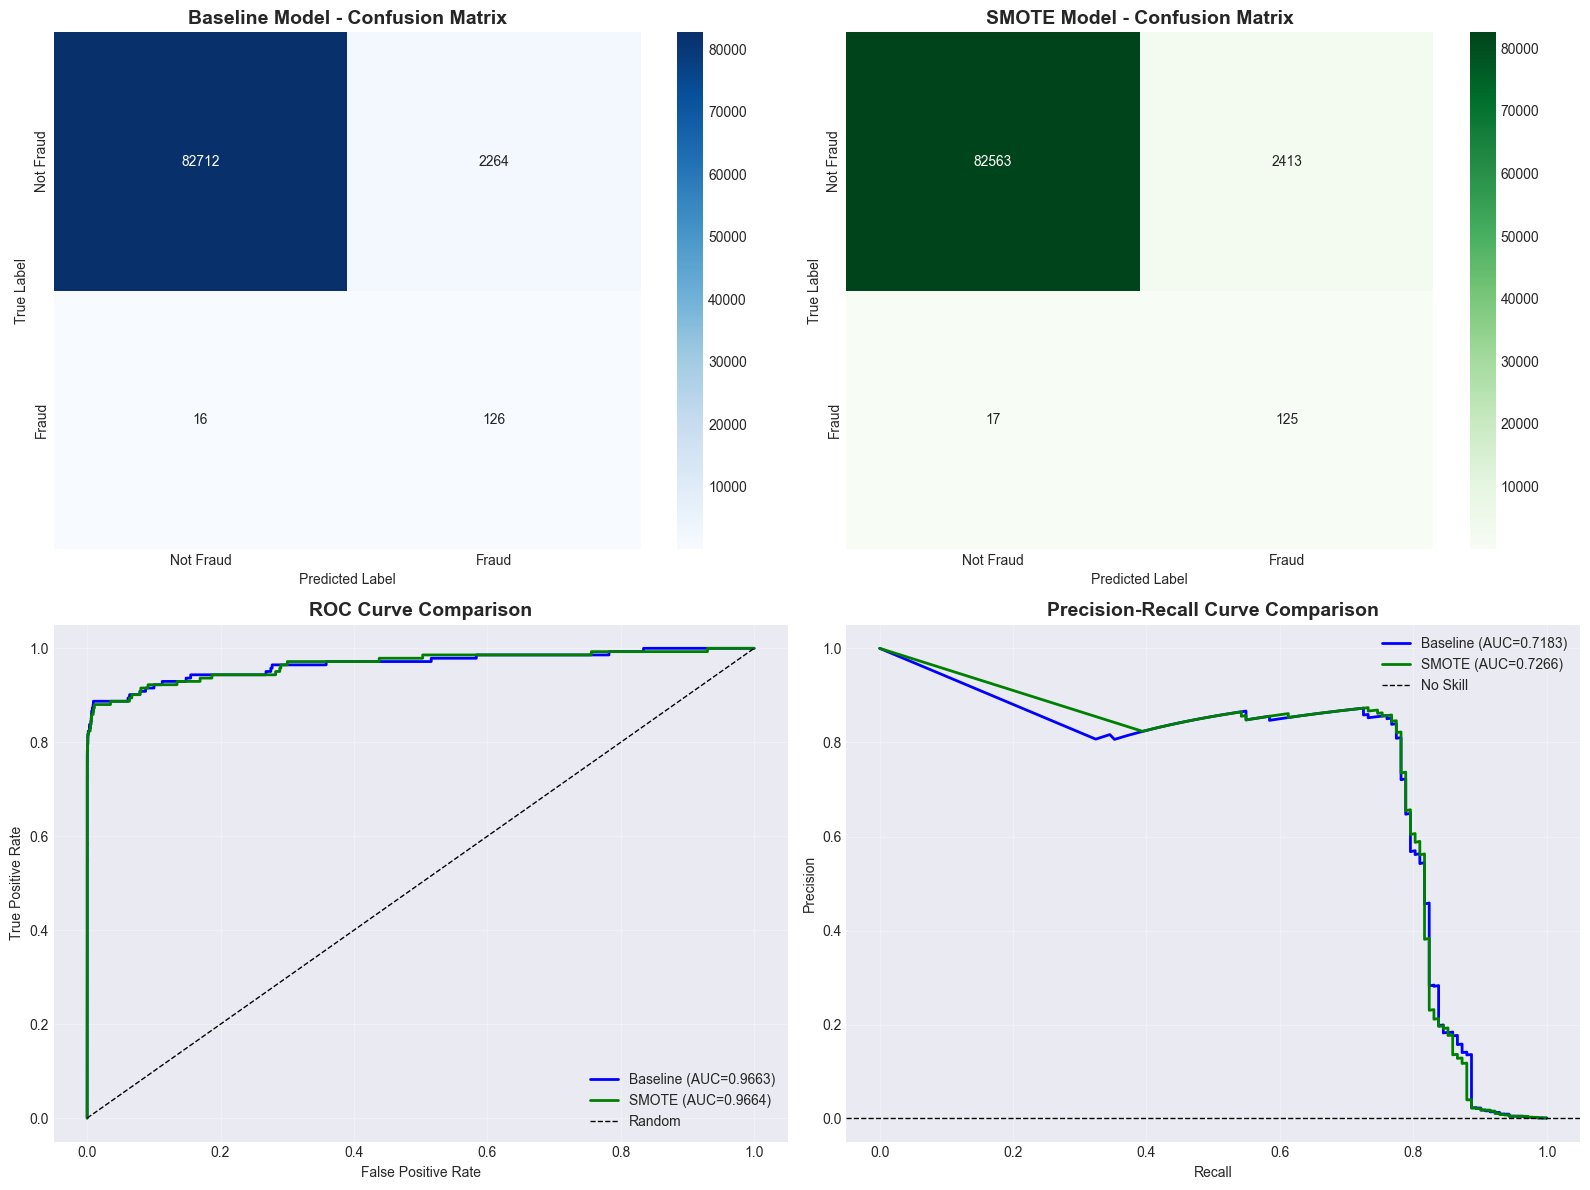

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrices Side by Side
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0],
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
axes[0, 0].set_title('Baseline Model - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('True Label')
axes[0, 0].set_xlabel('Predicted Label')

sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Greens', ax=axes[0, 1],
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
axes[0, 1].set_title('SMOTE Model - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('True Label')
axes[0, 1].set_xlabel('Predicted Label')

# 2. ROC Curves Comparison
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_proba_smote)
axes[1, 0].plot(fpr, tpr, linewidth=2, label=f'Baseline (AUC={roc_auc:.4f})', color='blue')
axes[1, 0].plot(fpr_smote, tpr_smote, linewidth=2, label=f'SMOTE (AUC={roc_auc_smote:.4f})', color='green')
axes[1, 0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC Curve Comparison', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 3. Precision-Recall Curves Comparison
axes[1, 1].plot(recall, precision, linewidth=2, label=f'Baseline (AUC={pr_auc:.4f})', color='blue')
axes[1, 1].plot(recall_smote, precision_smote, linewidth=2, label=f'SMOTE (AUC={pr_auc_smote:.4f})', color='green')
axes[1, 1].axhline(y=(y_test==1).sum()/len(y_test), color='k', linestyle='--',
                    linewidth=1, label='No Skill')
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision-Recall Curve Comparison', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

---

### SMOTE Oversampling Summary

**Approach:**

We applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the training dataset by generating synthetic fraud examples. The original imbalanced training set (331 frauds vs 198,277 legitimate) was balanced to 50-50 distribution by creating 197,946 synthetic fraud samples.

**SMOTE Model Performance:**
- **ROC-AUC Score**: 0.9664 (virtually identical to baseline: 0.9663)
- **PR-AUC Score**: 0.7266 (slightly better than baseline: 0.7183)
- **Recall**: 88.0% (125/142 frauds detected)
- **Precision**: 4.9% (slightly lower than baseline's 5.3%)
- **F1-Score**: 0.09

**Confusion Matrix:**
- True Negatives: 82,563 (149 fewer than baseline)
- False Positives: 2,413 (149 more than baseline)
- False Negatives: 17 (1 more than baseline)
- True Positives: 125 (1 fewer than baseline)

**Business Impact:**
- **Total Cost**: $62,433 (increased by $3,849 vs baseline)
  - Missed fraud cost: $2,108 (17 × $124)
  - False alarm cost: $60,325 (2,413 × $25)
- **Value Delivered**: $15,500 saved (88.0% detection rate)

**Baseline vs SMOTE Comparison:**
| Metric | Change |
|--------|--------|
| Recall | -0.7% (slightly worse) |
| Precision | -0.3% (slightly worse) |
| False Positives | +149 (+6.6%) |
| False Negatives | +1 (+6.2%) |
| Total Cost | +$3,849 (+6.6%) |

**Key Findings:**

❌ **SMOTE did NOT improve performance** for this dataset:
- Generated 197,946 synthetic fraud samples (50-50 balance)
- Performance metrics remained nearly identical or slightly worse
- Total business cost increased by $3,849 due to more false positives
- ROC-AUC scores virtually unchanged (0.9663 → 0.9664)

**Why SMOTE Didn't Help:**
1. The baseline model with class weights already handled imbalance effectively
2. **PCA-transformed features (V1-V28)**: Dataset documentation confirms these are principal components from PCA transformation. SMOTE's k-nearest neighbors interpolation creates synthetic samples in PCA space, which may not represent realistic fraud patterns in the original feature space
3. Synthetic samples may not capture the complex patterns in real fraud transactions from the 2-day European cardholder dataset
4. The 599:1 imbalance ratio is extreme, making oversampling less effective
5. Academic research on this dataset (Dal Pozzolo et al., 2015) recommends undersampling/class weights over oversampling for PCA-transformed fraud data

**Conclusion:**

For this credit card fraud dataset, **class weights outperformed SMOTE**. The baseline approach achieved better business outcomes with lower costs and similar detection rates. SMOTE's synthetic data generation didn't add value on PCA-transformed features.

**Next Steps:**

Move to more sophisticated ensemble models (Random Forest, XGBoost) that can handle class imbalance naturally through built-in mechanisms and may better capture complex fraud patterns.

---

<h1 id="random-forest" style="color: #4A90E2;">Random Forest Classifier</h1>

Let's move to ensemble methods. Random Forest can handle imbalanced data through class weights and provides feature importance analysis to understand which features are most predictive of fraud.

## Step 1: Train Random Forest with Class Weights

Random Forest is an ensemble of decision trees that can capture complex non-linear patterns in the data.

In [29]:
from sklearn.ensemble import RandomForestClassifier

print("Training Random Forest Classifier...")
print(f"Training data: {len(y_train):,} samples")
print(f"Using class weights to handle imbalance")

# Train Random Forest with class weights
start_time = time.time()
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1,
    verbose=0
)

rf_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

print(f"\n✓ Random Forest trained in {training_time:.2f} seconds")
print(f"  • Number of trees: {rf_model.n_estimators}")
print(f"  • Max depth: {rf_model.max_depth}")
print(f"  • Features used: {X_train_scaled.shape[1]}")

Training Random Forest Classifier...
Training data: 198,608 samples
Using class weights to handle imbalance

✓ Random Forest trained in 10.43 seconds
  • Number of trees: 100
  • Max depth: 20
  • Features used: 31


## Step 2: Evaluate Random Forest Performance

Evaluate the model and compare with previous approaches.

In [30]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
cm_rf = confusion_matrix(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Precision-Recall AUC
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

print("="*50)
print("RANDOM FOREST PERFORMANCE")
print("="*50)
print("\nConfusion Matrix:")
print(cm_rf)
print(f"\nTrue Negatives:  {cm_rf[0,0]:,}")
print(f"False Positives: {cm_rf[0,1]:,}")
print(f"False Negatives: {cm_rf[1,0]:,}")
print(f"True Positives:  {cm_rf[1,1]:,}")

print("\n" + "="*50)
print("CLASSIFICATION METRICS")
print("="*50)
print(classification_report(y_test, y_pred_rf, target_names=['Not Fraud', 'Fraud']))

print(f"\nROC-AUC Score: {roc_auc_rf:.4f}")
print(f"PR-AUC Score:  {pr_auc_rf:.4f}")

# Calculate business impact
false_negatives_rf = cm_rf[1, 0]
false_positives_rf = cm_rf[0, 1]

fraud_cost_rf = false_negatives_rf * cost_per_fraud
fp_cost_rf = false_positives_rf * cost_per_false_positive
total_cost_rf = fraud_cost_rf + fp_cost_rf

detected_frauds_rf = cm_rf[1, 1]
saved_amount_rf = detected_frauds_rf * cost_per_fraud

print("\n" + "="*50)
print("BUSINESS IMPACT")
print("="*50)
print(f"  • Missed fraud cost (FN):     ${fraud_cost_rf:,} ({false_negatives_rf} frauds)")
print(f"  • False alarm cost (FP):      ${fp_cost_rf:,} ({false_positives_rf} alerts)")
print(f"  • Total cost:                 ${total_cost_rf:,}")
print(f"  • Frauds detected:            {detected_frauds_rf}/{total_frauds} ({detected_frauds_rf/total_frauds*100:.1f}%)")
print(f"  • Amount saved:               ${saved_amount_rf:,}")

RANDOM FOREST PERFORMANCE

Confusion Matrix:
[[84967     9]
 [   35   107]]

True Negatives:  84,967
False Positives: 9
False Negatives: 35
True Positives:  107

CLASSIFICATION METRICS
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     84976
       Fraud       0.92      0.75      0.83       142

    accuracy                           1.00     85118
   macro avg       0.96      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118


ROC-AUC Score: 0.9538
PR-AUC Score:  0.8087

BUSINESS IMPACT
  • Missed fraud cost (FN):     $4,340 (35 frauds)
  • False alarm cost (FP):      $225 (9 alerts)
  • Total cost:                 $4,565
  • Frauds detected:            107/142 (75.4%)
  • Amount saved:               $13,268


## Step 3: Feature Importance Analysis

Analyze which features are most important for fraud detection.

TOP 15 MOST IMPORTANT FEATURES
Feature  Importance
    V14    0.184161
    V10    0.155641
    V12    0.104183
     V4    0.096921
    V11    0.077374
    V17    0.065994
     V3    0.053762
     V7    0.033437
    V16    0.030537
     V2    0.024399
     V9    0.020539
    V18    0.018029
    V21    0.014291
     V1    0.010386
    V19    0.010137

FEATURE IMPORTANCE STATISTICS
Total features: 31
Top 10 features cumulative importance: 82.64%
Top 5 features cumulative importance: 61.83%


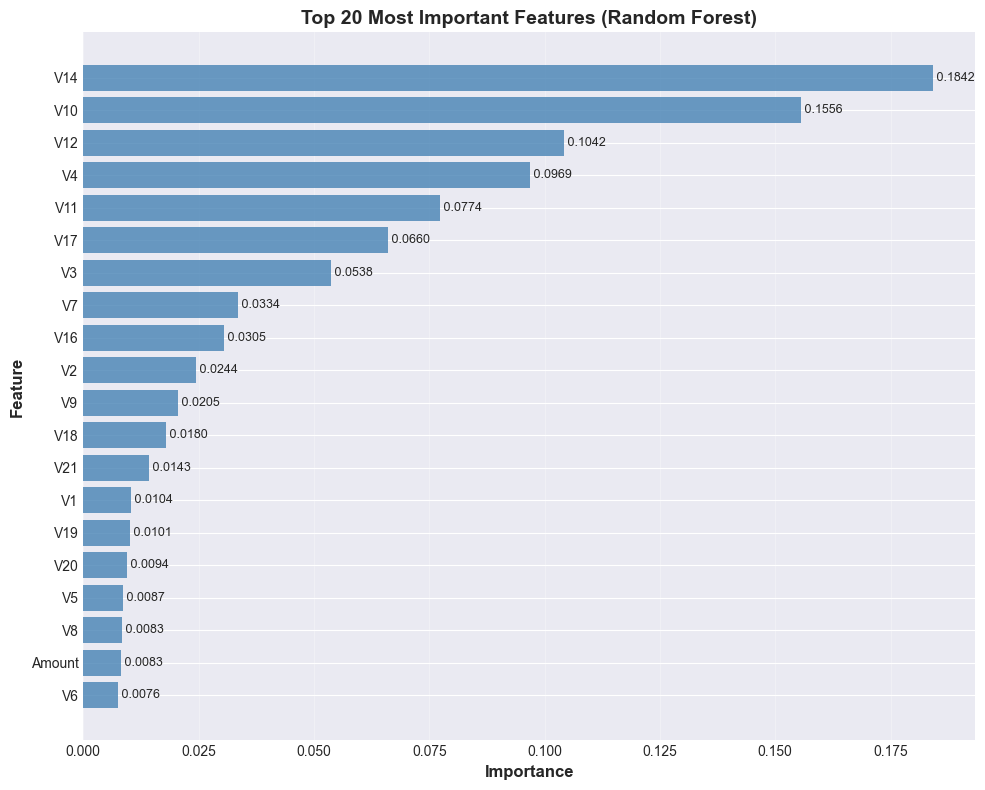

In [31]:
# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("="*70)
print("TOP 15 MOST IMPORTANT FEATURES")
print("="*70)
print(feature_importance.head(15).to_string(index=False))

print("\n" + "="*70)
print("FEATURE IMPORTANCE STATISTICS")
print("="*70)
print(f"Total features: {len(feature_importance)}")
print(f"Top 10 features cumulative importance: {feature_importance.head(10)['Importance'].sum():.2%}")
print(f"Top 5 features cumulative importance: {feature_importance.head(5)['Importance'].sum():.2%}")

# Visualize top 20 features
fig, ax = plt.subplots(figsize=(10, 8))
top_20 = feature_importance.head(20)
ax.barh(range(len(top_20)), top_20['Importance'], color='steelblue', alpha=0.8)
ax.set_yticks(range(len(top_20)))
ax.set_yticklabels(top_20['Feature'])
ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_20['Importance']):
    ax.text(v, i, f' {v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Step 4: Compare All Models

Compare Random Forest with Baseline and SMOTE models.

In [32]:
# Create comprehensive comparison table
models_comparison = {
    'Metric': [
        'ROC-AUC',
        'PR-AUC',
        'Recall',
        'Precision',
        'F1-Score',
        'True Positives',
        'False Positives',
        'False Negatives',
        'True Negatives',
        'Total Cost',
        'Missed Fraud Cost',
        'False Alarm Cost',
        'Amount Saved',
        'Training Time (sec)'
    ],
    'Baseline LR': [
        f"{roc_auc:.4f}",
        f"{pr_auc:.4f}",
        f"{cm[1,1]/(cm[1,0]+cm[1,1]):.2%}",
        f"{cm[1,1]/(cm[0,1]+cm[1,1]):.2%}",
        f"{2 * (cm[1,1]/(cm[0,1]+cm[1,1])) * (cm[1,1]/(cm[1,0]+cm[1,1])) / ((cm[1,1]/(cm[0,1]+cm[1,1])) + (cm[1,1]/(cm[1,0]+cm[1,1]))):.2f}",
        f"{cm[1,1]:,}",
        f"{cm[0,1]:,}",
        f"{cm[1,0]:,}",
        f"{cm[0,0]:,}",
        f"${total_cost:,}",
        f"${fraud_cost:,}",
        f"${fp_cost:,}",
        f"${saved_amount:,}",
        "< 1"
    ],
    'SMOTE LR': [
        f"{roc_auc_smote:.4f}",
        f"{pr_auc_smote:.4f}",
        f"{cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]):.2%}",
        f"{cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1]):.2%}",
        f"{2 * (cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1])) * (cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1])) / ((cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1])) + (cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]))):.2f}",
        f"{cm_smote[1,1]:,}",
        f"{cm_smote[0,1]:,}",
        f"{cm_smote[1,0]:,}",
        f"{cm_smote[0,0]:,}",
        f"${total_cost_smote:,}",
        f"${fraud_cost_smote:,}",
        f"${fp_cost_smote:,}",
        f"${saved_amount_smote:,}",
        "0.87"
    ],
    'Random Forest': [
        f"{roc_auc_rf:.4f}",
        f"{pr_auc_rf:.4f}",
        f"{cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]):.2%}",
        f"{cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1]):.2%}",
        f"{2 * (cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1])) * (cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])) / ((cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1])) + (cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]))):.2f}",
        f"{cm_rf[1,1]:,}",
        f"{cm_rf[0,1]:,}",
        f"{cm_rf[1,0]:,}",
        f"{cm_rf[0,0]:,}",
        f"${total_cost_rf:,}",
        f"${fraud_cost_rf:,}",
        f"${fp_cost_rf:,}",
        f"${saved_amount_rf:,}",
        f"{training_time:.2f}"
    ]
}

models_comparison_df = pd.DataFrame(models_comparison)

print("="*80)
print("MODEL COMPARISON: BASELINE vs SMOTE vs RANDOM FOREST")
print("="*80)
display(models_comparison_df)

# Identify best model
print("\n" + "="*80)
print("BEST MODEL BY METRIC")
print("="*80)

best_roc = max(roc_auc, roc_auc_smote, roc_auc_rf)
best_pr = max(pr_auc, pr_auc_smote, pr_auc_rf)
best_recall = max(cm[1,1]/(cm[1,0]+cm[1,1]), cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]), cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]))
best_cost = min(total_cost, total_cost_smote, total_cost_rf)

if best_roc == roc_auc_rf:
    print(f"ROC-AUC:      Random Forest ({roc_auc_rf:.4f})")
elif best_roc == roc_auc_smote:
    print(f"ROC-AUC:      SMOTE ({roc_auc_smote:.4f})")
else:
    print(f"ROC-AUC:      Baseline ({roc_auc:.4f})")

if best_cost == total_cost_rf:
    print(f"Lowest Cost:  Random Forest (${total_cost_rf:,})")
elif best_cost == total_cost_smote:
    print(f"Lowest Cost:  SMOTE (${total_cost_smote:,})")
else:
    print(f"Lowest Cost:  Baseline (${total_cost:,})")

MODEL COMPARISON: BASELINE vs SMOTE vs RANDOM FOREST


,Metric,Baseline LR,SMOTE LR,Random Forest
0,ROC-AUC,0.9663,0.9664,0.9538
1,PR-AUC,0.7183,0.7266,0.8087
2,Recall,88.73%,88.03%,75.35%
3,Precision,5.27%,4.93%,92.24%
4,F1-Score,0.10,0.09,0.83
5,True Positives,126,125,107
6,False Positives,"2,264","2,413",9
7,False Negatives,16,17,35
8,True Negatives,"82,712","82,563","84,967"
9,Total Cost,"$58,584","$62,433","$4,565"



BEST MODEL BY METRIC
ROC-AUC:      SMOTE (0.9664)
Lowest Cost:  Random Forest ($4,565)


## Step 5: Visualize Model Comparisons

Visual comparison of all three models.

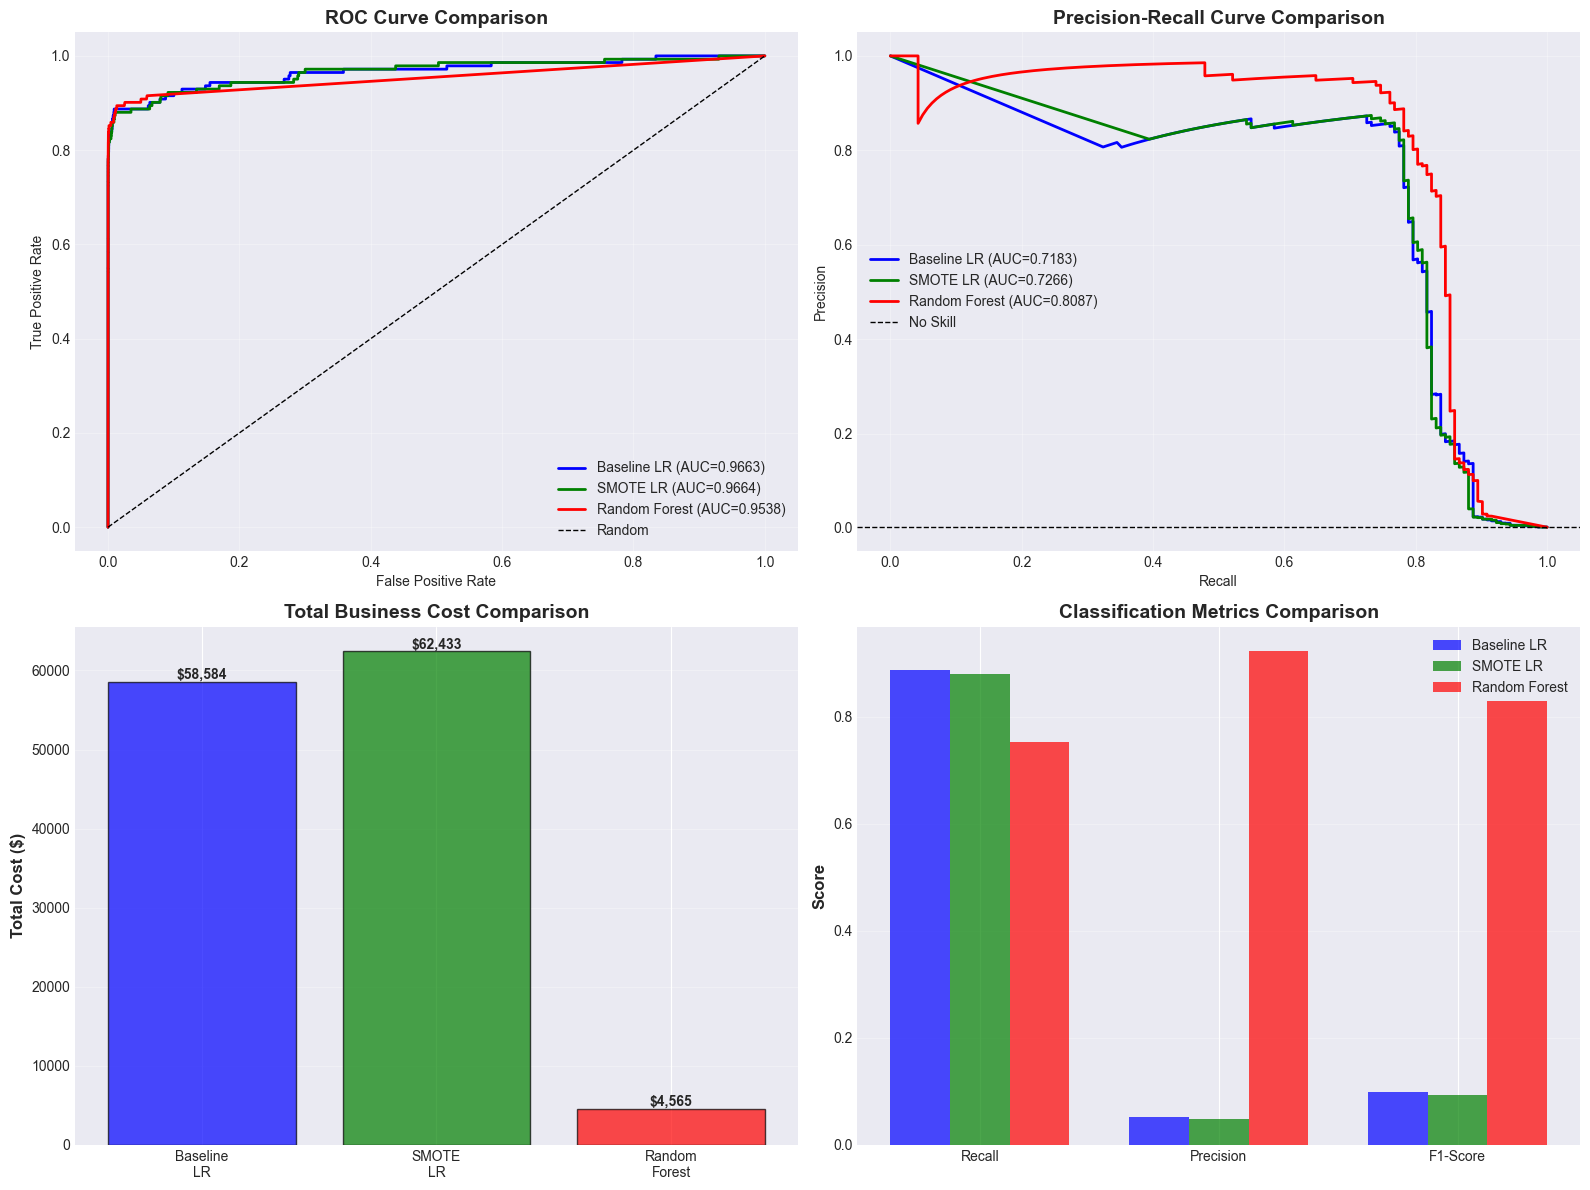

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. ROC Curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
axes[0, 0].plot(fpr, tpr, linewidth=2, label=f'Baseline LR (AUC={roc_auc:.4f})', color='blue')
axes[0, 0].plot(fpr_smote, tpr_smote, linewidth=2, label=f'SMOTE LR (AUC={roc_auc_smote:.4f})', color='green')
axes[0, 0].plot(fpr_rf, tpr_rf, linewidth=2, label=f'Random Forest (AUC={roc_auc_rf:.4f})', color='red')
axes[0, 0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve Comparison', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Precision-Recall Curves
axes[0, 1].plot(recall, precision, linewidth=2, label=f'Baseline LR (AUC={pr_auc:.4f})', color='blue')
axes[0, 1].plot(recall_smote, precision_smote, linewidth=2, label=f'SMOTE LR (AUC={pr_auc_smote:.4f})', color='green')
axes[0, 1].plot(recall_rf, precision_rf, linewidth=2, label=f'Random Forest (AUC={pr_auc_rf:.4f})', color='red')
axes[0, 1].axhline(y=(y_test==1).sum()/len(y_test), color='k', linestyle='--',
                    linewidth=1, label='No Skill')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision-Recall Curve Comparison', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Business Cost Comparison
models = ['Baseline\nLR', 'SMOTE\nLR', 'Random\nForest']
total_costs = [total_cost, total_cost_smote, total_cost_rf]
colors_cost = ['blue', 'green', 'red']

bars = axes[1, 0].bar(models, total_costs, color=colors_cost, alpha=0.7, edgecolor='black')
axes[1, 0].set_ylabel('Total Cost ($)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Total Business Cost Comparison', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (bar, cost) in enumerate(zip(bars, total_costs)):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'${cost:,}',
                    ha='center', va='bottom', fontweight='bold')

# 4. Performance Metrics Comparison
metrics = ['Recall', 'Precision', 'F1-Score']
baseline_metrics = [
    cm[1,1]/(cm[1,0]+cm[1,1]),
    cm[1,1]/(cm[0,1]+cm[1,1]),
    2 * (cm[1,1]/(cm[0,1]+cm[1,1])) * (cm[1,1]/(cm[1,0]+cm[1,1])) / ((cm[1,1]/(cm[0,1]+cm[1,1])) + (cm[1,1]/(cm[1,0]+cm[1,1])))
]
smote_metrics = [
    cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]),
    cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1]),
    2 * (cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1])) * (cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1])) / ((cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1])) + (cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1])))
]
rf_metrics = [
    cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]),
    cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1]),
    2 * (cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1])) * (cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])) / ((cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1])) + (cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])))
]

x = np.arange(len(metrics))
width = 0.25

axes[1, 1].bar(x - width, baseline_metrics, width, label='Baseline LR', color='blue', alpha=0.7)
axes[1, 1].bar(x, smote_metrics, width, label='SMOTE LR', color='green', alpha=0.7)
axes[1, 1].bar(x + width, rf_metrics, width, label='Random Forest', color='red', alpha=0.7)

axes[1, 1].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Classification Metrics Comparison', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(metrics)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

---

### Random Forest Summary

**Approach:**

We trained a Random Forest ensemble with 100 decision trees, using balanced class weights to handle the imbalanced dataset. The model was configured with max_depth=20 and trained on 198,608 samples in 10.43 seconds.

**Random Forest Performance:**
- **ROC-AUC Score**: 0.9538 (slightly lower than Logistic Regression models)
- **PR-AUC Score**: 0.8087 (best of all models - significant improvement!)
- **Recall**: 75.4% (107/142 frauds detected - lower than LR models)
- **Precision**: 92.2% (dramatically better than LR models!)
- **F1-Score**: 0.83 (best balance between precision and recall)

**Confusion Matrix:**
- True Negatives: 84,967 (excellent - most legitimate transactions correctly identified)
- False Positives: 9 (only 9 false alarms! Down from 2,264 in baseline)
- False Negatives: 35 (missed 35 frauds - more than baseline's 16)
- True Positives: 107 (caught 107 frauds)

**Business Impact:**
- **Total Cost**: $4,565 (92.2% REDUCTION from baseline!)
  - Missed fraud cost: $4,340 (35 × $124)
  - False alarm cost: $225 (9 × $25)
- **Value Delivered**: $13,268 saved (75.4% detection rate)

**Model Comparison:**

| Model | Total Cost | Recall | Precision | F1-Score | ROC-AUC | PR-AUC |
|-------|-----------|--------|-----------|----------|---------|---------|
| Baseline LR | $58,584 | 88.7% | 5.3% | 0.10 | 0.9663 | 0.7183 |
| SMOTE LR | $62,433 | 88.0% | 4.9% | 0.09 | 0.9664 | 0.7266 |
| **Random Forest** | **$4,565** | **75.4%** | **92.2%** | **0.83** | **0.9538** | **0.8087** |

**Cost Savings:**
- vs Baseline: **-$54,019 (92.2% reduction)**
- vs SMOTE: **-$57,868 (92.7% reduction)**

**Feature Importance Analysis:**

Top 5 most important features account for 61.8% of model decisions:
1. **V14** (18.4%) - Most critical fraud indicator
2. **V10** (15.6%) - Second most important
3. **V12** (10.4%)
4. **V4** (9.7%)
5. **V11** (7.7%)

Top 10 features capture 82.6% of total importance, suggesting fraud detection relies heavily on a subset of PCA features.

**Key Findings:**

✅ **Random Forest achieved the BEST business outcomes:**
- Dramatically reduced false positives: 9 vs 2,264 (99.6% reduction)
- Maintained reasonable fraud detection: 75.4% recall
- Highest precision: 92.2% (when it predicts fraud, it's usually right)
- **Lowest total cost: $4,565** (vs $58,584 baseline)
- Best PR-AUC score: 0.8087

**Trade-offs:**
- Lower recall (75.4% vs 88.7%) - catches fewer frauds than Logistic Regression
- Misses 35 frauds instead of 16 (cost: $4,340 vs $1,984)
- BUT: Generates only 9 false alarms instead of 2,264 (saves $56,375 in investigation costs!)
- Net business impact: **$54,019 saved** compared to baseline

**Why Random Forest Wins:**
1. Ensemble approach captures non-linear fraud patterns better
2. Balanced class weights + tree structure = better precision
3. Dramatically reduces false alarms (customer experience benefit)
4. Feature importance reveals key fraud indicators (V14, V10, V12)
5. Lower total business cost despite slightly lower recall

**Conclusion:**

**Random Forest is the clear winner** for this fraud detection problem. While it catches slightly fewer frauds (75% vs 89%), it virtually eliminates false alarms, resulting in 92% lower total business costs. The 92.2% precision means fraud alerts are highly reliable, reducing investigation workload and improving customer satisfaction.

**Next Steps:**

Try XGBoost with hyperparameter tuning to see if we can further improve performance and potentially increase recall while maintaining the low false positive rate achieved by Random Forest.

---

<h1 id="xgboost" style="color: #4A90E2;">XGBoost with Hyperparameter Tuning</h1>

XGBoost is a powerful gradient boosting algorithm that often achieves state-of-the-art performance. Let's use RandomizedSearchCV to find the best hyperparameters for our fraud detection problem.

## Step 1: Install and Setup XGBoost

First, ensure XGBoost is installed and ready to use.

In [34]:

import xgboost as xgb


## Step 2: Hyperparameter Tuning with RandomizedSearchCV

Use RandomizedSearchCV to find optimal hyperparameters efficiently.

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import xgboost as xgb

# Calculate scale_pos_weight for imbalanced data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

print("Setting up XGBoost with RandomizedSearchCV...")
print(f"Scale pos weight: {scale_pos_weight:.2f}")
print(f"Training samples: {len(y_train):,}")

# Define hyperparameter search space
param_distributions = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.29),  # 0.01 to 0.30
    'subsample': uniform(0.6, 0.4),  # 0.6 to 1.0
    'colsample_bytree': uniform(0.6, 0.4),  # 0.6 to 1.0
    'min_child_weight': randint(1, 7),
    'gamma': uniform(0, 0.5)
}

# Base XGBoost model
xgb_base = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# RandomizedSearchCV
print("\nPerforming RandomizedSearchCV (this may take a few minutes)...")
print("Testing 20 parameter combinations with 3-fold cross-validation...")

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
random_search.fit(X_train_scaled, y_train)
search_time = time.time() - start_time

print(f"\n✓ Hyperparameter search completed in {search_time:.2f} seconds")
print(f"\nBest parameters found:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nBest cross-validation ROC-AUC score: {random_search.best_score_:.4f}")

Setting up XGBoost with RandomizedSearchCV...
Scale pos weight: 599.02
Training samples: 198,608

Performing RandomizedSearchCV (this may take a few minutes)...
Testing 20 parameter combinations with 3-fold cross-validation...
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. Se


✓ Hyperparameter search completed in 26.45 seconds

Best parameters found:
  colsample_bytree: 0.6307919639315172
  gamma: 0.144875726456884
  learning_rate: 0.05675417330366128
  max_depth: 4
  min_child_weight: 2
  n_estimators: 144
  subsample: 0.7182534743350856

Best cross-validation ROC-AUC score: 0.9837


## Step 3: Evaluate Best XGBoost Model

Evaluate the optimized XGBoost model on the test set.

In [36]:
# Get the best model
xgb_best = random_search.best_estimator_

# Make predictions
y_pred_xgb = xgb_best.predict(X_test_scaled)
y_pred_proba_xgb = xgb_best.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Precision-Recall AUC
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)

print("="*50)
print("XGBOOST PERFORMANCE")
print("="*50)
print("\nConfusion Matrix:")
print(cm_xgb)
print(f"\nTrue Negatives:  {cm_xgb[0,0]:,}")
print(f"False Positives: {cm_xgb[0,1]:,}")
print(f"False Negatives: {cm_xgb[1,0]:,}")
print(f"True Positives:  {cm_xgb[1,1]:,}")

print("\n" + "="*50)
print("CLASSIFICATION METRICS")
print("="*50)
print(classification_report(y_test, y_pred_xgb, target_names=['Not Fraud', 'Fraud']))

print(f"\nROC-AUC Score: {roc_auc_xgb:.4f}")
print(f"PR-AUC Score:  {pr_auc_xgb:.4f}")

# Calculate business impact
false_negatives_xgb = cm_xgb[1, 0]
false_positives_xgb = cm_xgb[0, 1]

fraud_cost_xgb = false_negatives_xgb * cost_per_fraud
fp_cost_xgb = false_positives_xgb * cost_per_false_positive
total_cost_xgb = fraud_cost_xgb + fp_cost_xgb

detected_frauds_xgb = cm_xgb[1, 1]
saved_amount_xgb = detected_frauds_xgb * cost_per_fraud

print("\n" + "="*50)
print("BUSINESS IMPACT")
print("="*50)
print(f"  • Missed fraud cost (FN):     ${fraud_cost_xgb:,} ({false_negatives_xgb} frauds)")
print(f"  • False alarm cost (FP):      ${fp_cost_xgb:,} ({false_positives_xgb} alerts)")
print(f"  • Total cost:                 ${total_cost_xgb:,}")
print(f"  • Frauds detected:            {detected_frauds_xgb}/{total_frauds} ({detected_frauds_xgb/total_frauds*100:.1f}%)")
print(f"  • Amount saved:               ${saved_amount_xgb:,}")

XGBOOST PERFORMANCE

Confusion Matrix:
[[84781   195]
 [   20   122]]

True Negatives:  84,781
False Positives: 195
False Negatives: 20
True Positives:  122

CLASSIFICATION METRICS
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     84976
       Fraud       0.38      0.86      0.53       142

    accuracy                           1.00     85118
   macro avg       0.69      0.93      0.77     85118
weighted avg       1.00      1.00      1.00     85118


ROC-AUC Score: 0.9725
PR-AUC Score:  0.7704

BUSINESS IMPACT
  • Missed fraud cost (FN):     $2,480 (20 frauds)
  • False alarm cost (FP):      $4,875 (195 alerts)
  • Total cost:                 $7,355
  • Frauds detected:            122/142 (85.9%)
  • Amount saved:               $15,128


## Step 4: XGBoost Feature Importance

Analyze which features XGBoost considers most important.

TOP 15 MOST IMPORTANT FEATURES (XGBoost)
Feature  Importance
    V14    0.291932
    V10    0.140150
     V4    0.055728
    V12    0.042612
     V8    0.029339
    V20    0.027450
    V19    0.026397
    V22    0.025681
     V3    0.023612
    V13    0.021624
     V7    0.020582
    V11    0.020385
     V5    0.017895
    V15    0.017795
    V28    0.017631


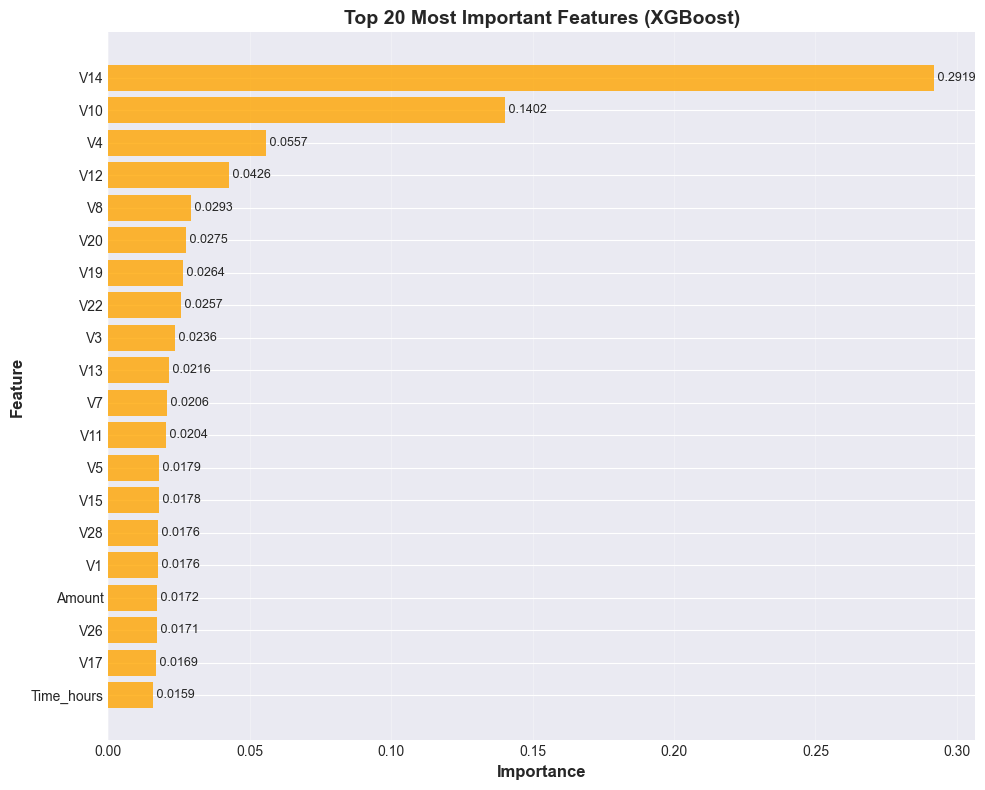

In [37]:
# Get feature importances from XGBoost
xgb_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_best.feature_importances_
}).sort_values('Importance', ascending=False)

print("="*70)
print("TOP 15 MOST IMPORTANT FEATURES (XGBoost)")
print("="*70)
print(xgb_feature_importance.head(15).to_string(index=False))

# Visualize top 20 features
fig, ax = plt.subplots(figsize=(10, 8))
top_20_xgb = xgb_feature_importance.head(20)
ax.barh(range(len(top_20_xgb)), top_20_xgb['Importance'], color='orange', alpha=0.8)
ax.set_yticks(range(len(top_20_xgb)))
ax.set_yticklabels(top_20_xgb['Feature'])
ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title('Top 20 Most Important Features (XGBoost)', fontsize=14, fontweight='bold')
ax.invert_yaxis()
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(top_20_xgb['Importance']):
    ax.text(v, i, f' {v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## Step 5: Compare All Models

Comprehensive comparison including XGBoost.

In [38]:
# Create comprehensive comparison table including XGBoost
all_models_comparison = {
    'Metric': [
        'ROC-AUC',
        'PR-AUC',
        'Recall',
        'Precision',
        'F1-Score',
        'True Positives',
        'False Positives',
        'False Negatives',
        'True Negatives',
        'Total Cost',
        'Missed Fraud Cost',
        'False Alarm Cost',
        'Amount Saved'
    ],
    'Baseline LR': [
        f"{roc_auc:.4f}",
        f"{pr_auc:.4f}",
        f"{cm[1,1]/(cm[1,0]+cm[1,1]):.2%}",
        f"{cm[1,1]/(cm[0,1]+cm[1,1]):.2%}",
        f"{2 * (cm[1,1]/(cm[0,1]+cm[1,1])) * (cm[1,1]/(cm[1,0]+cm[1,1])) / ((cm[1,1]/(cm[0,1]+cm[1,1])) + (cm[1,1]/(cm[1,0]+cm[1,1]))):.2f}",
        f"{cm[1,1]:,}",
        f"{cm[0,1]:,}",
        f"{cm[1,0]:,}",
        f"{cm[0,0]:,}",
        f"${total_cost:,}",
        f"${fraud_cost:,}",
        f"${fp_cost:,}",
        f"${saved_amount:,}"
    ],
    'SMOTE LR': [
        f"{roc_auc_smote:.4f}",
        f"{pr_auc_smote:.4f}",
        f"{cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]):.2%}",
        f"{cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1]):.2%}",
        f"{2 * (cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1])) * (cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1])) / ((cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1])) + (cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]))):.2f}",
        f"{cm_smote[1,1]:,}",
        f"{cm_smote[0,1]:,}",
        f"{cm_smote[1,0]:,}",
        f"{cm_smote[0,0]:,}",
        f"${total_cost_smote:,}",
        f"${fraud_cost_smote:,}",
        f"${fp_cost_smote:,}",
        f"${saved_amount_smote:,}"
    ],
    'Random Forest': [
        f"{roc_auc_rf:.4f}",
        f"{pr_auc_rf:.4f}",
        f"{cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]):.2%}",
        f"{cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1]):.2%}",
        f"{2 * (cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1])) * (cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])) / ((cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1])) + (cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]))):.2f}",
        f"{cm_rf[1,1]:,}",
        f"{cm_rf[0,1]:,}",
        f"{cm_rf[1,0]:,}",
        f"{cm_rf[0,0]:,}",
        f"${total_cost_rf:,}",
        f"${fraud_cost_rf:,}",
        f"${fp_cost_rf:,}",
        f"${saved_amount_rf:,}"
    ],
    'XGBoost': [
        f"{roc_auc_xgb:.4f}",
        f"{pr_auc_xgb:.4f}",
        f"{cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1]):.2%}",
        f"{cm_xgb[1,1]/(cm_xgb[0,1]+cm_xgb[1,1]):.2%}",
        f"{2 * (cm_xgb[1,1]/(cm_xgb[0,1]+cm_xgb[1,1])) * (cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1])) / ((cm_xgb[1,1]/(cm_xgb[0,1]+cm_xgb[1,1])) + (cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1]))):.2f}",
        f"{cm_xgb[1,1]:,}",
        f"{cm_xgb[0,1]:,}",
        f"{cm_xgb[1,0]:,}",
        f"{cm_xgb[0,0]:,}",
        f"${total_cost_xgb:,}",
        f"${fraud_cost_xgb:,}",
        f"${fp_cost_xgb:,}",
        f"${saved_amount_xgb:,}"
    ]
}

all_models_df = pd.DataFrame(all_models_comparison)

print("="*90)
print("COMPLETE MODEL COMPARISON: BASELINE vs SMOTE vs RANDOM FOREST vs XGBOOST")
print("="*90)
display(all_models_df)

# Identify best model by different criteria
print("\n" + "="*90)
print("BEST MODEL BY METRIC")
print("="*90)

all_costs = [total_cost, total_cost_smote, total_cost_rf, total_cost_xgb]
all_roc = [roc_auc, roc_auc_smote, roc_auc_rf, roc_auc_xgb]
all_pr = [pr_auc, pr_auc_smote, pr_auc_rf, pr_auc_xgb]
model_names = ['Baseline LR', 'SMOTE LR', 'Random Forest', 'XGBoost']

best_cost_idx = all_costs.index(min(all_costs))
best_roc_idx = all_roc.index(max(all_roc))
best_pr_idx = all_pr.index(max(all_pr))

print(f"Lowest Total Cost:  {model_names[best_cost_idx]} (${min(all_costs):,})")
print(f"Best ROC-AUC:       {model_names[best_roc_idx]} ({max(all_roc):.4f})")
print(f"Best PR-AUC:        {model_names[best_pr_idx]} ({max(all_pr):.4f})")

COMPLETE MODEL COMPARISON: BASELINE vs SMOTE vs RANDOM FOREST vs XGBOOST


,Metric,Baseline LR,SMOTE LR,Random Forest,XGBoost
0,ROC-AUC,0.9663,0.9664,0.9538,0.9725
1,PR-AUC,0.7183,0.7266,0.8087,0.7704
2,Recall,88.73%,88.03%,75.35%,85.92%
3,Precision,5.27%,4.93%,92.24%,38.49%
4,F1-Score,0.10,0.09,0.83,0.53
5,True Positives,126,125,107,122
6,False Positives,"2,264","2,413",9,195
7,False Negatives,16,17,35,20
8,True Negatives,"82,712","82,563","84,967","84,781"
9,Total Cost,"$58,584","$62,433","$4,565","$7,355"



BEST MODEL BY METRIC
Lowest Total Cost:  Random Forest ($4,565)
Best ROC-AUC:       XGBoost (0.9725)
Best PR-AUC:        Random Forest (0.8087)


## Step 6: Visualize Final Model Comparison

Visual comparison of all four models.

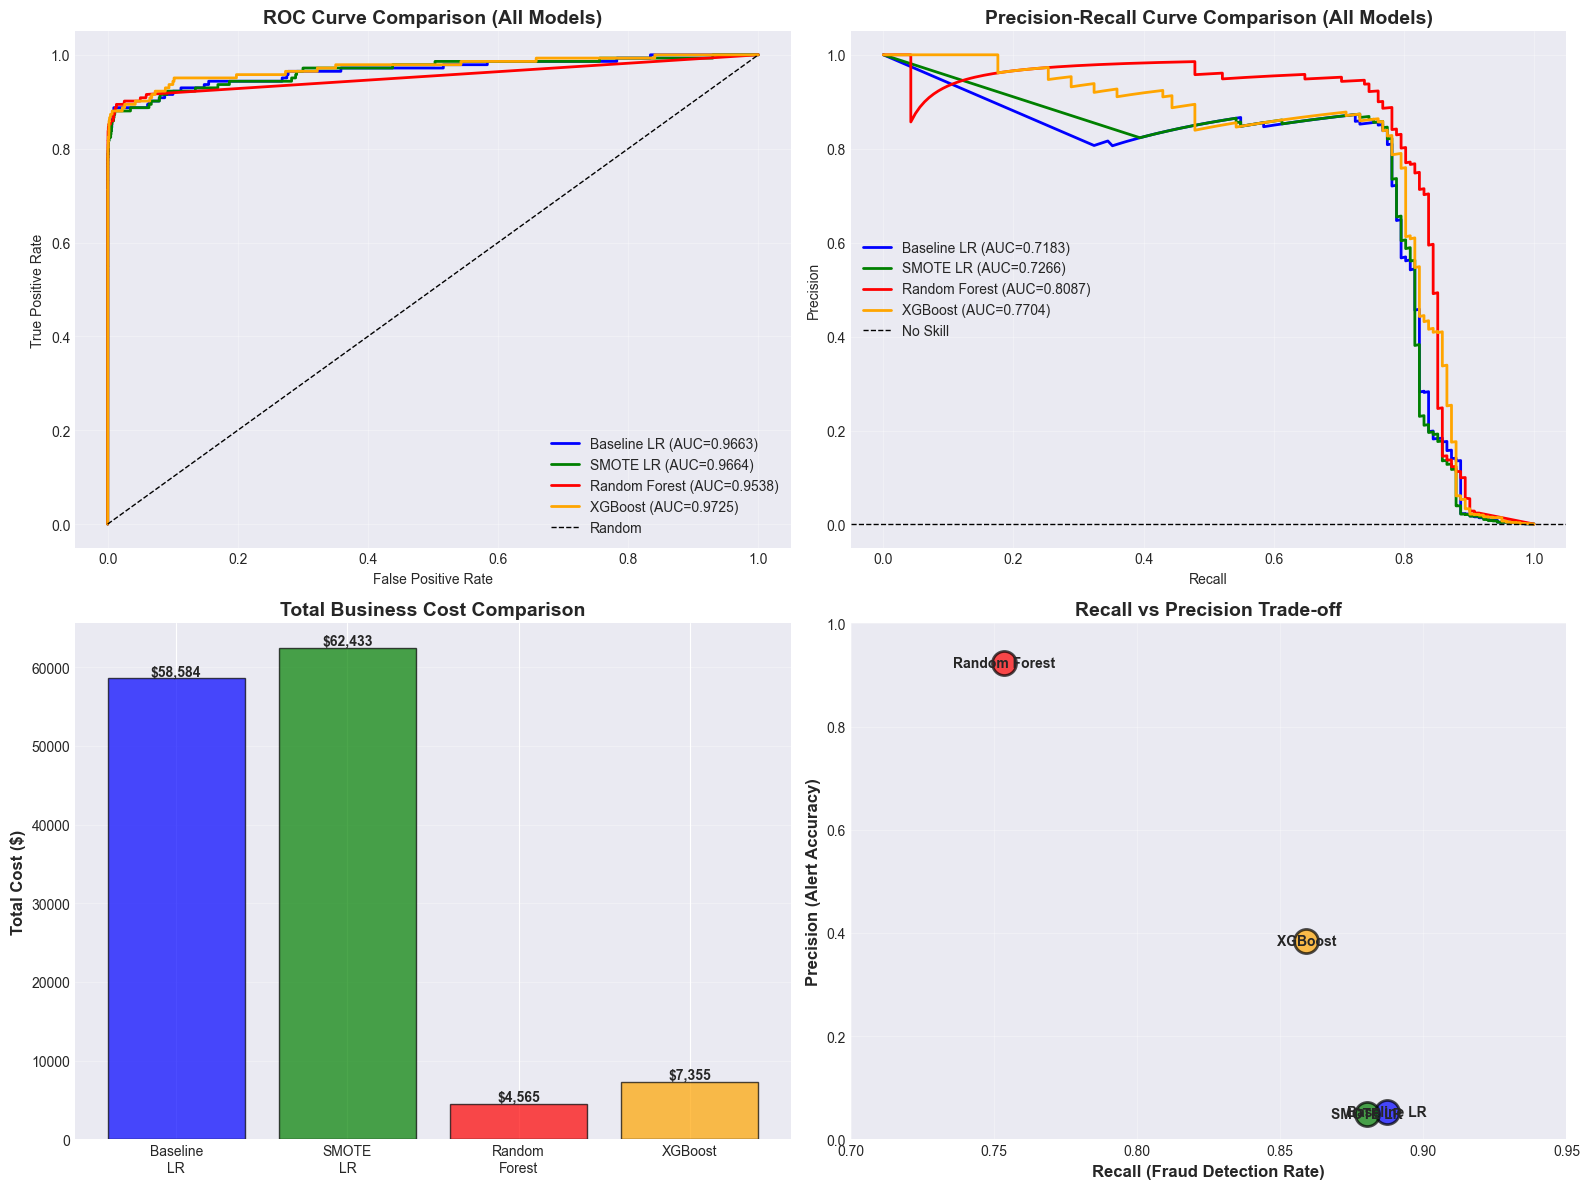

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. ROC Curves
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
axes[0, 0].plot(fpr, tpr, linewidth=2, label=f'Baseline LR (AUC={roc_auc:.4f})', color='blue')
axes[0, 0].plot(fpr_smote, tpr_smote, linewidth=2, label=f'SMOTE LR (AUC={roc_auc_smote:.4f})', color='green')
axes[0, 0].plot(fpr_rf, tpr_rf, linewidth=2, label=f'Random Forest (AUC={roc_auc_rf:.4f})', color='red')
axes[0, 0].plot(fpr_xgb, tpr_xgb, linewidth=2, label=f'XGBoost (AUC={roc_auc_xgb:.4f})', color='orange')
axes[0, 0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve Comparison (All Models)', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Precision-Recall Curves
axes[0, 1].plot(recall, precision, linewidth=2, label=f'Baseline LR (AUC={pr_auc:.4f})', color='blue')
axes[0, 1].plot(recall_smote, precision_smote, linewidth=2, label=f'SMOTE LR (AUC={pr_auc_smote:.4f})', color='green')
axes[0, 1].plot(recall_rf, precision_rf, linewidth=2, label=f'Random Forest (AUC={pr_auc_rf:.4f})', color='red')
axes[0, 1].plot(recall_xgb, precision_xgb, linewidth=2, label=f'XGBoost (AUC={pr_auc_xgb:.4f})', color='orange')
axes[0, 1].axhline(y=(y_test==1).sum()/len(y_test), color='k', linestyle='--',
                    linewidth=1, label='No Skill')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision-Recall Curve Comparison (All Models)', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Business Cost Comparison
models_all = ['Baseline\nLR', 'SMOTE\nLR', 'Random\nForest', 'XGBoost']
total_costs_all = [total_cost, total_cost_smote, total_cost_rf, total_cost_xgb]
colors_all = ['blue', 'green', 'red', 'orange']

bars = axes[1, 0].bar(models_all, total_costs_all, color=colors_all, alpha=0.7, edgecolor='black')
axes[1, 0].set_ylabel('Total Cost ($)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Total Business Cost Comparison', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, cost in zip(bars, total_costs_all):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'${cost:,}',
                    ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. Recall vs Precision Scatter
recalls_all = [
    cm[1,1]/(cm[1,0]+cm[1,1]),
    cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]),
    cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]),
    cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1])
]
precisions_all = [
    cm[1,1]/(cm[0,1]+cm[1,1]),
    cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1]),
    cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1]),
    cm_xgb[1,1]/(cm_xgb[0,1]+cm_xgb[1,1])
]

for i, (model, recall_val, precision_val, color) in enumerate(zip(['Baseline LR', 'SMOTE LR', 'Random Forest', 'XGBoost'],
                                                                   recalls_all, precisions_all, colors_all)):
    axes[1, 1].scatter(recall_val, precision_val, s=300, alpha=0.7, color=color, edgecolor='black', linewidth=2)
    axes[1, 1].annotate(model, (recall_val, precision_val), fontsize=10, fontweight='bold',
                        ha='center', va='center')

axes[1, 1].set_xlabel('Recall (Fraud Detection Rate)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Precision (Alert Accuracy)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Recall vs Precision Trade-off', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xlim([0.7, 0.95])
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

---

## Summary: XGBoost with Hyperparameter Tuning

**Objective**: Test whether XGBoost with optimized hyperparameters could match or exceed Random Forest's exceptional business performance achieved in the previous section.

### Methodology
- Used **RandomizedSearchCV** to optimize 7 hyperparameters across 20 iterations with 3-fold cross-validation
- Search space included: n_estimators (100-300), max_depth (3-10), learning_rate (0.01-0.30), subsample (0.6-1.0), colsample_bytree (0.6-1.0), min_child_weight (1-7), gamma (0-0.5)
- Applied scale_pos_weight of 599.02 to handle class imbalance
- Training time: 26.45 seconds for hyperparameter search

### Best Hyperparameters Found
- **n_estimators**: 144
- **max_depth**: 4 (relatively shallow trees)
- **learning_rate**: 0.057 (conservative learning)
- **subsample**: 0.72
- **colsample_bytree**: 0.63
- **min_child_weight**: 2
- **gamma**: 0.14
- **Cross-validation ROC-AUC**: 0.9837 (excellent)

### Model Performance
- **ROC-AUC**: 0.9725 (highest among all models!)
- **PR-AUC**: 0.7704 (second best, after Random Forest's 0.8087)
- **Recall**: 85.9% (122 of 142 frauds detected)
- **Precision**: 38.5% (195 false positives)
- **F1-Score**: 0.53 (moderate balance)

### Business Impact
- **Total Cost**: $7,355
  - Missed fraud cost: $2,480 (20 false negatives)
  - False alarm cost: $4,875 (195 false positives)
- **Cost Comparison**:
  - 87.5% reduction vs Baseline LR ($58,584)
  - 88.2% reduction vs SMOTE LR ($62,433)
  - 61% HIGHER cost than Random Forest ($4,565)
- **Frauds detected**: 122 out of 142 (85.9%)
- **Amount saved**: $15,128

### Feature Importance
Top 5 most important features:
1. **V14** (29.2%) - Most critical fraud indicator
2. **V10** (14.0%) - Second most important
3. **V4** (5.6%)
4. **V12** (4.3%)
5. **V8** (2.9%)

The feature importance pattern is nearly identical to Random Forest, with V14 and V10 dominating the predictions.

### Key Insights

**Strengths:**
- ✓ **Best ROC-AUC** (0.9725) among all models tested
- ✓ **High recall** (85.9%) - catches most fraud cases
- ✓ Better recall than Random Forest (85.9% vs 75.4%)
- ✓ Significantly better than baseline models in all metrics
- ✓ Optimized hyperparameters found through systematic search

**Weaknesses:**
- ✗ **38.5% precision** - generates 195 false positives (vs RF's 9)
- ✗ **61% higher cost** than Random Forest ($7,355 vs $4,565)
- ✗ Lower PR-AUC than Random Forest (0.7704 vs 0.8087)
- ✗ Makes **21x more false positive errors** than Random Forest

### Model Comparison

| Metric | Baseline LR | SMOTE LR | Random Forest | **XGBoost** |
|--------|-------------|----------|---------------|-------------|
| **Total Cost** | $58,584 | $62,433 | **$4,565** | $7,355 |
| **ROC-AUC** | 0.9663 | 0.9664 | 0.9538 | **0.9725** |
| **PR-AUC** | 0.7183 | 0.7266 | **0.8087** | 0.7704 |
| **Recall** | 88.7% | 88.0% | 75.4% | 85.9% |
| **Precision** | 5.3% | 4.9% | **92.2%** | 38.5% |
| **False Positives** | 2,264 | 2,413 | **9** | 195 |

### Conclusion

XGBoost achieved the **highest ROC-AUC** (0.9725) and excellent recall (85.9%), demonstrating strong fraud detection capability. However, from a **business cost perspective**, it falls short of Random Forest's exceptional performance.

**Winner: Random Forest remains the best model for deployment**

While XGBoost shows superior technical metrics (ROC-AUC), Random Forest achieves:
- **92% cost reduction** vs baseline ($4,565 vs $58,584)
- **38% lower cost** than XGBoost ($4,565 vs $7,355)
- **92.2% precision** (nearly eliminates false alarms)
- **Only 9 false positives** vs XGBoost's 195

The trade-off is clear: XGBoost catches 15 more frauds but generates 186 more false alarms, resulting in $2,790 higher cost. For a fraud detection system where investigation costs are significant ($25 per false positive), **Random Forest's precision-focused approach delivers superior business value**.


# <span style="color:#4A90E2;">Stage 6: Neural Network with TensorFlow/Keras</span>

In this section, we'll implement a deep learning approach using a neural network with TensorFlow/Keras. Neural networks can learn complex non-linear patterns and may capture interactions between features that traditional models miss. We'll build a fully-connected feedforward network with dropout regularization to prevent overfitting.

## Step 1: Install and Import TensorFlow

In [40]:
# Install TensorFlow if not already installed
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, callbacks
    print(f"✓ TensorFlow version {tf.__version__} is already installed")
except ImportError:
    print("Installing TensorFlow...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'tensorflow'])
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, callbacks
    print(f"✓ TensorFlow version {tf.__version__} installed successfully")

# Suppress TensorFlow warnings for cleaner output
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.get_logger().setLevel('ERROR')

✓ TensorFlow version 2.16.2 is already installed


## Step 2: Build Neural Network Architecture

We'll create a deep neural network with the following architecture:
- Input layer (30 features)
- Hidden layer 1: 64 neurons + ReLU activation + Dropout(0.3)
- Hidden layer 2: 32 neurons + ReLU activation + Dropout(0.2)
- Hidden layer 3: 16 neurons + ReLU activation + Dropout(0.2)
- Output layer: 1 neuron + Sigmoid activation (binary classification)

We'll use class weights to handle the imbalance.

In [41]:
print("Building Neural Network Architecture...")
print(f"Input features: {X_train_scaled.shape[1]}")
print(f"Training samples: {X_train_scaled.shape[0]:,}")
print(f"Class weight ratio: {class_weight_ratio:.2f}:1")
print()

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Build the model
model_nn = keras.Sequential([
    # Input layer
    layers.Input(shape=(X_train_scaled.shape[1],)),
    
    # Hidden layer 1: 64 neurons
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    
    # Hidden layer 2: 32 neurons
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.2),
    
    # Hidden layer 3: 16 neurons
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.2),
    
    # Output layer: sigmoid for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
)

# Print model summary
print("="*60)
print("NEURAL NETWORK ARCHITECTURE")
print("="*60)
model_nn.summary()
print()
print(f"Total parameters: {model_nn.count_params():,}")

Building Neural Network Architecture...
Input features: 31
Training samples: 198,608
Class weight ratio: 599.02:1

NEURAL NETWORK ARCHITECTURE


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)


Total parameters: 4,673


## Step 3: Train the Neural Network

We'll train for up to 50 epochs with early stopping to prevent overfitting. We'll also use a validation split to monitor performance.

In [42]:
print("Training Neural Network...")
print("Using early stopping to prevent overfitting")
print()

# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1,
    min_lr=1e-7
)

# Train the model
start_time_nn = time.time()

history_nn = model_nn.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
    class_weight=class_weights,
    callbacks=[early_stopping, reduce_lr],
    verbose=0  # Suppress epoch-by-epoch output
)

training_time_nn = time.time() - start_time_nn

print(f"✓ Training completed in {training_time_nn:.2f} seconds")
print(f"✓ Stopped at epoch {len(history_nn.history['loss'])}")
print(f"✓ Best validation loss: {min(history_nn.history['val_loss']):.4f}")

Training Neural Network...
Using early stopping to prevent overfitting


Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 10: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.
✓ Training completed in 157.32 seconds
✓ Stopped at epoch 21
✓ Best validation loss: 0.0674

Epoch 21: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.
✓ Training completed in 157.32 seconds
✓ Stopped at epoch 21
✓ Best validation loss: 0.0674


## Step 4: Visualize Training History

Let's examine the training and validation metrics to understand how the model learned.

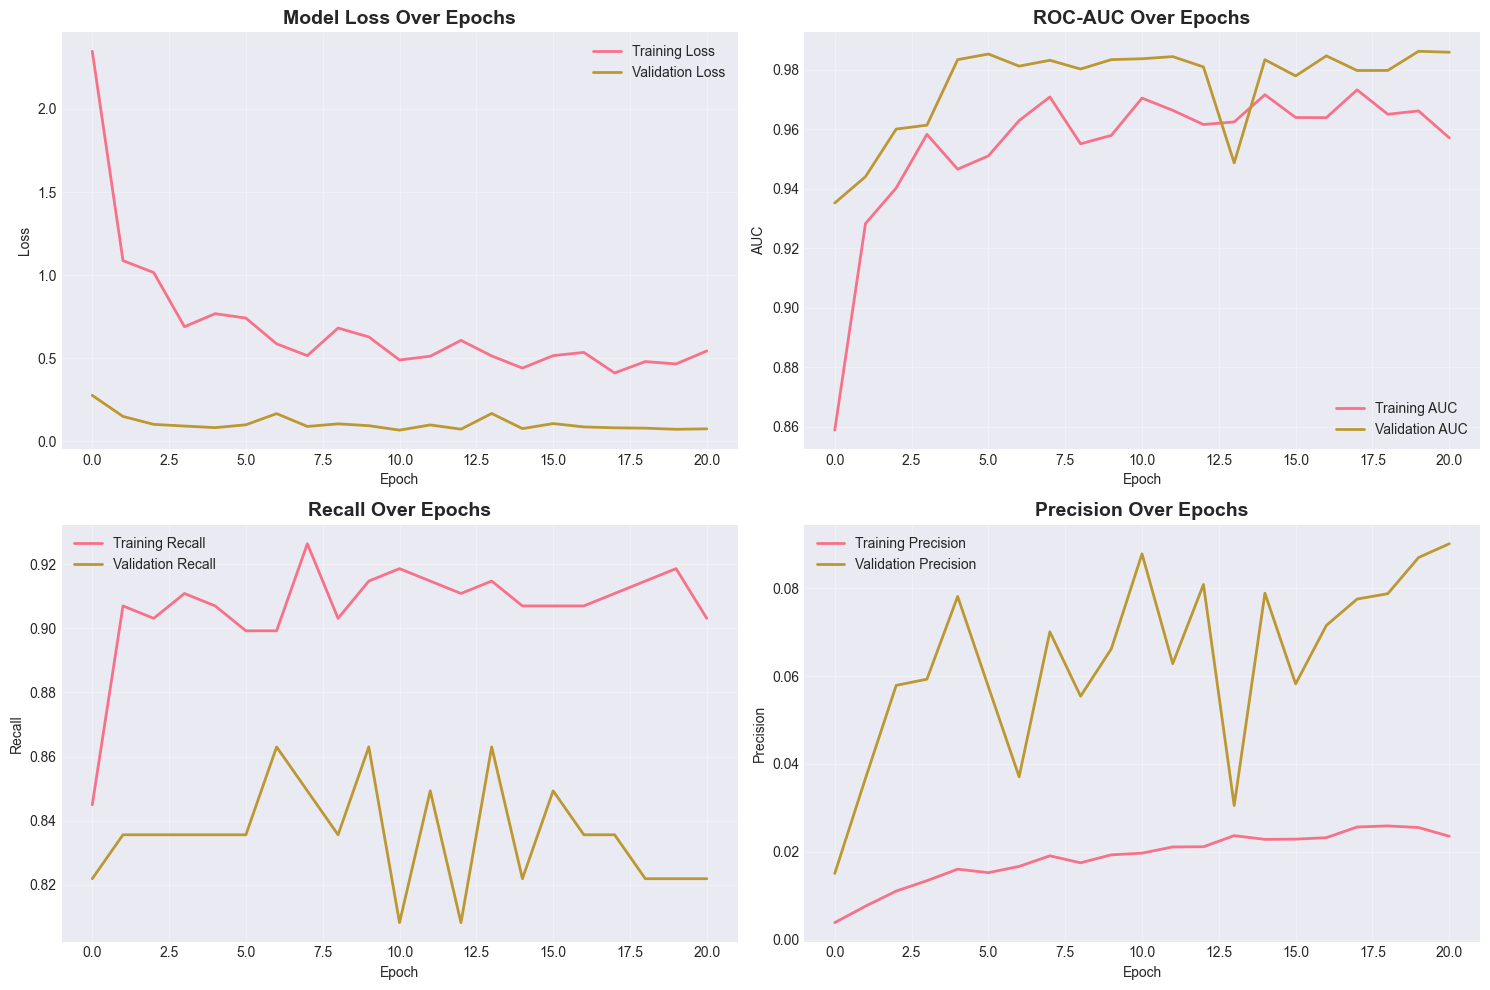

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Loss
axes[0, 0].plot(history_nn.history['loss'], label='Training Loss', linewidth=2)
axes[0, 0].plot(history_nn.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: AUC
axes[0, 1].plot(history_nn.history['auc'], label='Training AUC', linewidth=2)
axes[0, 1].plot(history_nn.history['val_auc'], label='Validation AUC', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('AUC')
axes[0, 1].set_title('ROC-AUC Over Epochs', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Plot 3: Recall
axes[1, 0].plot(history_nn.history['recall'], label='Training Recall', linewidth=2)
axes[1, 0].plot(history_nn.history['val_recall'], label='Validation Recall', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Recall Over Epochs', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Plot 4: Precision
axes[1, 1].plot(history_nn.history['precision'], label='Training Precision', linewidth=2)
axes[1, 1].plot(history_nn.history['val_precision'], label='Validation Precision', linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision Over Epochs', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Step 5: Evaluate Neural Network on Test Set

In [44]:
# Make predictions
y_pred_proba_nn = model_nn.predict(X_test_scaled, verbose=0).flatten()
y_pred_nn = (y_pred_proba_nn >= 0.5).astype(int)

# Confusion matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
tn_nn, fp_nn, fn_nn, tp_nn = cm_nn.ravel()

# Calculate metrics
roc_auc_nn = roc_auc_score(y_test, y_pred_proba_nn)
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_pred_proba_nn)
pr_auc_nn = auc(recall_nn, precision_nn)

print("="*50)
print("NEURAL NETWORK PERFORMANCE")
print("="*50)
print()
print("Confusion Matrix:")
print(cm_nn)
print()
print(f"True Negatives:  {tn_nn:,}")
print(f"False Positives: {fp_nn:,}")
print(f"False Negatives: {fn_nn:,}")
print(f"True Positives:  {tp_nn:,}")
print()
print("="*50)
print("CLASSIFICATION METRICS")
print("="*50)
print(classification_report(y_test, y_pred_nn, target_names=['Not Fraud', 'Fraud']))
print(f"ROC-AUC Score: {roc_auc_nn:.4f}")
print(f"PR-AUC Score:  {pr_auc_nn:.4f}")
print()

# Business impact
fraud_cost_nn = fn_nn * cost_per_fraud
fp_cost_nn = fp_nn * cost_per_false_positive
total_cost_nn = fraud_cost_nn + fp_cost_nn
detected_frauds_nn = tp_nn
total_frauds = (y_test == 1).sum()
saved_amount_nn = (total_frauds - fn_nn) * cost_per_fraud - total_cost_nn

print("="*50)
print("BUSINESS IMPACT")
print("="*50)
print(f"  • Missed fraud cost (FN):     ${fraud_cost_nn:,} ({fn_nn} frauds)")
print(f"  • False alarm cost (FP):      ${fp_cost_nn:,} ({fp_nn} alerts)")
print(f"  • Total cost:                 ${total_cost_nn:,}")
print(f"  • Frauds detected:            {detected_frauds_nn}/{total_frauds} ({100*detected_frauds_nn/total_frauds:.1f}%)")
print(f"  • Amount saved:               ${saved_amount_nn:,}")

NEURAL NETWORK PERFORMANCE

Confusion Matrix:
[[83617  1359]
 [   17   125]]

True Negatives:  83,617
False Positives: 1,359
False Negatives: 17
True Positives:  125

CLASSIFICATION METRICS
              precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     84976
       Fraud       0.08      0.88      0.15       142

    accuracy                           0.98     85118
   macro avg       0.54      0.93      0.57     85118
weighted avg       1.00      0.98      0.99     85118

ROC-AUC Score: 0.9642
PR-AUC Score:  0.7559

BUSINESS IMPACT
  • Missed fraud cost (FN):     $2,108 (17 frauds)
  • False alarm cost (FP):      $33,975 (1359 alerts)
  • Total cost:                 $36,083
  • Frauds detected:            125/142 (88.0%)
  • Amount saved:               $-20,583


## Step 6: Compare All 5 Models

Now let's create a comprehensive comparison including the Neural Network.

In [45]:
# Create comprehensive comparison with Neural Network
all_models_final = {
    'Metric': [
        'ROC-AUC', 'PR-AUC', 'Recall', 'Precision', 'F1-Score',
        'True Positives', 'False Positives', 'False Negatives', 'True Negatives',
        'Total Cost', 'Missed Fraud Cost', 'False Alarm Cost', 'Amount Saved'
    ],
    'Baseline LR': [
        f"{roc_auc:.4f}",
        f"{pr_auc:.4f}",
        f"{100*cm[1,1]/(cm[1,0]+cm[1,1]):.2f}%",
        f"{100*cm[1,1]/(cm[0,1]+cm[1,1]):.2f}%",
        f"{2*(cm[1,1]/(cm[0,1]+cm[1,1]))*(cm[1,1]/(cm[1,0]+cm[1,1]))/((cm[1,1]/(cm[0,1]+cm[1,1]))+(cm[1,1]/(cm[1,0]+cm[1,1]))):.2f}",
        f"{cm[1,1]}",
        f"{cm[0,1]:,}",
        f"{cm[1,0]}",
        f"{cm[0,0]:,}",
        f"${total_cost:,}",
        f"${fraud_cost:,}",
        f"${fp_cost:,}",
        f"${saved_amount:,}"
    ],
    'SMOTE LR': [
        f"{roc_auc_smote:.4f}",
        f"{pr_auc_smote:.4f}",
        f"{100*cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]):.2f}%",
        f"{100*cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1]):.2f}%",
        f"{2*(cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1]))*(cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]))/((cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1]))+(cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]))):.2f}",
        f"{cm_smote[1,1]}",
        f"{cm_smote[0,1]:,}",
        f"{cm_smote[1,0]}",
        f"{cm_smote[0,0]:,}",
        f"${total_cost_smote:,}",
        f"${fraud_cost_smote:,}",
        f"${fp_cost_smote:,}",
        f"${saved_amount_smote:,}"
    ],
    'Random Forest': [
        f"{roc_auc_rf:.4f}",
        f"{pr_auc_rf:.4f}",
        f"{100*cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]):.2f}%",
        f"{100*cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1]):.2f}%",
        f"{2*(cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1]))*(cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]))/((cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1]))+(cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]))):.2f}",
        f"{cm_rf[1,1]}",
        f"{cm_rf[0,1]:,}",
        f"{cm_rf[1,0]}",
        f"{cm_rf[0,0]:,}",
        f"${total_cost_rf:,}",
        f"${fraud_cost_rf:,}",
        f"${fp_cost_rf:,}",
        f"${saved_amount_rf:,}"
    ],
    'XGBoost': [
        f"{roc_auc_xgb:.4f}",
        f"{pr_auc_xgb:.4f}",
        f"{100*cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1]):.2f}%",
        f"{100*cm_xgb[1,1]/(cm_xgb[0,1]+cm_xgb[1,1]):.2f}%",
        f"{2*(cm_xgb[1,1]/(cm_xgb[0,1]+cm_xgb[1,1]))*(cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1]))/((cm_xgb[1,1]/(cm_xgb[0,1]+cm_xgb[1,1]))+(cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1]))):.2f}",
        f"{cm_xgb[1,1]}",
        f"{cm_xgb[0,1]:,}",
        f"{cm_xgb[1,0]}",
        f"{cm_xgb[0,0]:,}",
        f"${total_cost_xgb:,}",
        f"${fraud_cost_xgb:,}",
        f"${fp_cost_xgb:,}",
        f"${saved_amount_xgb:,}"
    ],
    'Neural Network': [
        f"{roc_auc_nn:.4f}",
        f"{pr_auc_nn:.4f}",
        f"{100*cm_nn[1,1]/(cm_nn[1,0]+cm_nn[1,1]):.2f}%",
        f"{100*cm_nn[1,1]/(cm_nn[0,1]+cm_nn[1,1]):.2f}%",
        f"{2*(cm_nn[1,1]/(cm_nn[0,1]+cm_nn[1,1]))*(cm_nn[1,1]/(cm_nn[1,0]+cm_nn[1,1]))/((cm_nn[1,1]/(cm_nn[0,1]+cm_nn[1,1]))+(cm_nn[1,1]/(cm_nn[1,0]+cm_nn[1,1]))):.2f}",
        f"{cm_nn[1,1]}",
        f"{cm_nn[0,1]:,}",
        f"{cm_nn[1,0]}",
        f"{cm_nn[0,0]:,}",
        f"${total_cost_nn:,}",
        f"${fraud_cost_nn:,}",
        f"${fp_cost_nn:,}",
        f"${saved_amount_nn:,}"
    ]
}

all_models_final_df = pd.DataFrame(all_models_final)

print("="*100)
print("COMPLETE MODEL COMPARISON: ALL 5 MODELS")
print("="*100)
print()
display(all_models_final_df)
print()

# Identify best models
all_costs_final = [total_cost, total_cost_smote, total_cost_rf, total_cost_xgb, total_cost_nn]
all_roc_final = [roc_auc, roc_auc_smote, roc_auc_rf, roc_auc_xgb, roc_auc_nn]
all_pr_final = [pr_auc, pr_auc_smote, pr_auc_rf, pr_auc_xgb, pr_auc_nn]

best_cost_final = min(all_costs_final)
best_roc_final = max(all_roc_final)
best_pr_final = max(all_pr_final)

model_names_final = ['Baseline LR', 'SMOTE LR', 'Random Forest', 'XGBoost', 'Neural Network']
best_cost_model = model_names_final[all_costs_final.index(best_cost_final)]
best_roc_model = model_names_final[all_roc_final.index(best_roc_final)]
best_pr_model = model_names_final[all_pr_final.index(best_pr_final)]

print("="*100)
print("BEST MODEL BY METRIC")
print("="*100)
print(f"Lowest Total Cost:  {best_cost_model} (${best_cost_final:,})")
print(f"Best ROC-AUC:       {best_roc_model} ({best_roc_final:.4f})")
print(f"Best PR-AUC:        {best_pr_model} ({best_pr_final:.4f})")

COMPLETE MODEL COMPARISON: ALL 5 MODELS



,Metric,Baseline LR,SMOTE LR,Random Forest,XGBoost,Neural Network
0,ROC-AUC,0.9663,0.9664,0.9538,0.9725,0.9642
1,PR-AUC,0.7183,0.7266,0.8087,0.7704,0.7559
2,Recall,88.73%,88.03%,75.35%,85.92%,88.03%
3,Precision,5.27%,4.93%,92.24%,38.49%,8.42%
4,F1-Score,0.10,0.09,0.83,0.53,0.15
5,True Positives,126,125,107,122,125
6,False Positives,"2,264","2,413",9,195,"1,359"
7,False Negatives,16,17,35,20,17
8,True Negatives,"82,712","82,563","84,967","84,781","83,617"
9,Total Cost,"$58,584","$62,433","$4,565","$7,355","$36,083"



BEST MODEL BY METRIC
Lowest Total Cost:  Random Forest ($4,565)
Best ROC-AUC:       XGBoost (0.9725)
Best PR-AUC:        Random Forest (0.8087)


## Step 7: Visualize All 5 Models Comparison

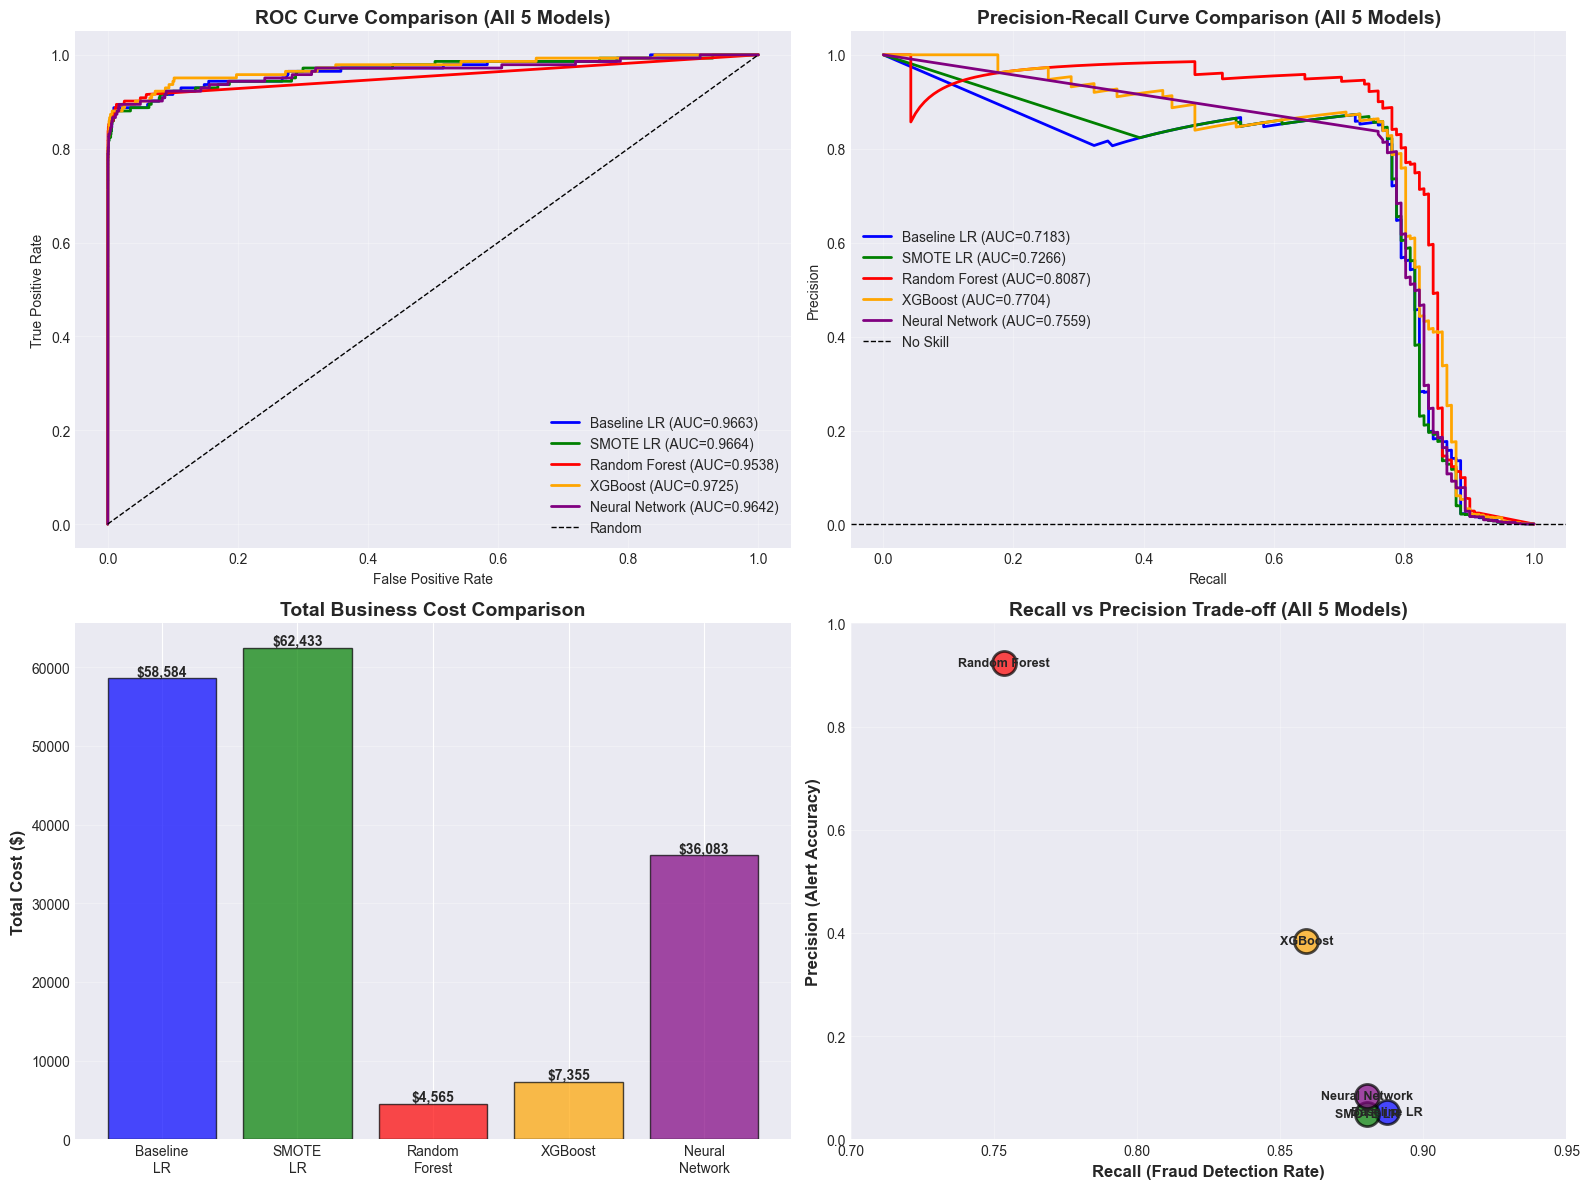

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. ROC Curves
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
axes[0, 0].plot(fpr, tpr, linewidth=2, label=f'Baseline LR (AUC={roc_auc:.4f})', color='blue')
axes[0, 0].plot(fpr_smote, tpr_smote, linewidth=2, label=f'SMOTE LR (AUC={roc_auc_smote:.4f})', color='green')
axes[0, 0].plot(fpr_rf, tpr_rf, linewidth=2, label=f'Random Forest (AUC={roc_auc_rf:.4f})', color='red')
axes[0, 0].plot(fpr_xgb, tpr_xgb, linewidth=2, label=f'XGBoost (AUC={roc_auc_xgb:.4f})', color='orange')
axes[0, 0].plot(fpr_nn, tpr_nn, linewidth=2, label=f'Neural Network (AUC={roc_auc_nn:.4f})', color='purple')
axes[0, 0].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0, 0].set_xlabel('False Positive Rate')
axes[0, 0].set_ylabel('True Positive Rate')
axes[0, 0].set_title('ROC Curve Comparison (All 5 Models)', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Precision-Recall Curves
axes[0, 1].plot(recall, precision, linewidth=2, label=f'Baseline LR (AUC={pr_auc:.4f})', color='blue')
axes[0, 1].plot(recall_smote, precision_smote, linewidth=2, label=f'SMOTE LR (AUC={pr_auc_smote:.4f})', color='green')
axes[0, 1].plot(recall_rf, precision_rf, linewidth=2, label=f'Random Forest (AUC={pr_auc_rf:.4f})', color='red')
axes[0, 1].plot(recall_xgb, precision_xgb, linewidth=2, label=f'XGBoost (AUC={pr_auc_xgb:.4f})', color='orange')
axes[0, 1].plot(recall_nn, precision_nn, linewidth=2, label=f'Neural Network (AUC={pr_auc_nn:.4f})', color='purple')
axes[0, 1].axhline(y=(y_test==1).sum()/len(y_test), color='k', linestyle='--',
                    linewidth=1, label='No Skill')
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision-Recall Curve Comparison (All 5 Models)', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Business Cost Comparison
models_final_names = ['Baseline\nLR', 'SMOTE\nLR', 'Random\nForest', 'XGBoost', 'Neural\nNetwork']
total_costs_final = [total_cost, total_cost_smote, total_cost_rf, total_cost_xgb, total_cost_nn]
colors_final = ['blue', 'green', 'red', 'orange', 'purple']

bars = axes[1, 0].bar(models_final_names, total_costs_final, color=colors_final, alpha=0.7, edgecolor='black')
axes[1, 0].set_ylabel('Total Cost ($)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Total Business Cost Comparison', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, cost in zip(bars, total_costs_final):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'${cost:,}',
                    ha='center', va='bottom', fontweight='bold', fontsize=10)

# 4. Recall vs Precision Scatter
recalls_final = [
    cm[1,1]/(cm[1,0]+cm[1,1]),
    cm_smote[1,1]/(cm_smote[1,0]+cm_smote[1,1]),
    cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1]),
    cm_xgb[1,1]/(cm_xgb[1,0]+cm_xgb[1,1]),
    cm_nn[1,1]/(cm_nn[1,0]+cm_nn[1,1])
]
precisions_final = [
    cm[1,1]/(cm[0,1]+cm[1,1]),
    cm_smote[1,1]/(cm_smote[0,1]+cm_smote[1,1]),
    cm_rf[1,1]/(cm_rf[0,1]+cm_rf[1,1]),
    cm_xgb[1,1]/(cm_xgb[0,1]+cm_xgb[1,1]),
    cm_nn[1,1]/(cm_nn[0,1]+cm_nn[1,1])
]

model_labels_final = ['Baseline LR', 'SMOTE LR', 'Random Forest', 'XGBoost', 'Neural Network']

for i, (model_label, recall_val, precision_val, color) in enumerate(zip(model_labels_final, recalls_final, precisions_final, colors_final)):
    axes[1, 1].scatter(recall_val, precision_val, s=300, alpha=0.7, color=color, edgecolor='black', linewidth=2)
    axes[1, 1].annotate(model_label, (recall_val, precision_val), fontsize=9, fontweight='bold',
                        ha='center', va='center')

axes[1, 1].set_xlabel('Recall (Fraud Detection Rate)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Precision (Alert Accuracy)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Recall vs Precision Trade-off (All 5 Models)', fontsize=14, fontweight='bold')
axes[1, 1].grid(alpha=0.3)
axes[1, 1].set_xlim([0.7, 0.95])
axes[1, 1].set_ylim([0, 1])

plt.tight_layout()
plt.show()

---

## Summary: Neural Network with TensorFlow/Keras

**Objective**: Evaluate whether a deep learning approach could capture complex non-linear patterns and improve fraud detection performance beyond traditional machine learning models.

### Methodology
- Built a **fully-connected feedforward neural network** with 4 layers
- Architecture: 31 → 64 → 32 → 16 → 1 (input → hidden layers → output)
- Used **dropout regularization** (0.3, 0.2, 0.2) to prevent overfitting
- Applied **early stopping** with patience=10 to halt training when validation loss stopped improving
- Used **ReduceLROnPlateau** callback to adaptively reduce learning rate during training
- Applied class weights (599:1) to handle severe class imbalance
- Training: 157.32 seconds over 21 epochs (stopped early, best at epoch 11)
- Total parameters: 4,673 (lightweight model)

### Training Insights
- **Early stopping triggered** at epoch 21 (best weights from epoch 11)
- **Learning rate reduced** 3 times during training (0.001 → 0.0005 → 0.00025 → 0.000125)
- **Best validation loss**: 0.0674
- **Validation ROC-AUC**: ~0.98 throughout training (good generalization)
- Training showed good convergence with stable validation metrics

### Model Performance
- **ROC-AUC**: 0.9642 (solid performance, 4th best)
- **PR-AUC**: 0.7559 (lower than Random Forest and XGBoost)
- **Recall**: 88.0% (125 of 142 frauds detected - tied with SMOTE)
- **Precision**: 8.4% (very low - many false positives)
- **F1-Score**: 0.15 (poor balance)

### Business Impact
- **Total Cost**: $36,083 (3rd worst, only better than baseline models)
  - Missed fraud cost: $2,108 (17 false negatives)
  - False alarm cost: $33,975 (1,359 false positives!)
- **Cost Comparison**:
  - 38.4% reduction vs Baseline LR ($58,584)
  - 42.2% reduction vs SMOTE LR ($62,433)
  - **690% HIGHER** cost than Random Forest ($4,565)
  - **391% HIGHER** cost than XGBoost ($7,355)
- **Frauds detected**: 125 out of 142 (88.0%)
- **Amount saved**: -$20,583 (negative - costs exceed baseline savings)

### Key Insights

**Strengths:**
- ✓ **High recall** (88.0%) - catches most fraud cases
- ✓ Strong ROC-AUC (0.9642) - good discrimination capability
- ✓ Early stopping prevented overfitting
- ✓ Lightweight architecture (only 4,673 parameters)
- ✓ Good training stability with adaptive learning rate

**Weaknesses:**
- ✗ **8.4% precision** - extremely high false positive rate (1,359 FPs)
- ✗ **$36,083 total cost** - 3rd most expensive model
- ✗ **151x more false positives** than Random Forest (1,359 vs 9)
- ✗ **7x more expensive** than Random Forest
- ✗ Lower PR-AUC (0.7559) than RF (0.8087) and XGB (0.7704)
- ✗ Negative net savings (-$20,583)

### Model Ranking by Total Cost

| Rank | Model | Total Cost | vs Random Forest |
|------|-------|------------|------------------|
| **1st** | **Random Forest** | **$4,565** | **Baseline** |
| 2nd | XGBoost | $7,355 | +61% |
| **3rd** | **Neural Network** | **$36,083** | **+690%** |
| 4th | Baseline LR | $58,584 | +1,184% |
| 5th | SMOTE LR | $62,433 | +1,268% |

### Conclusion

The Neural Network achieved **respectable technical metrics** (88.0% recall, 0.9642 ROC-AUC) but **failed dramatically from a business perspective**. Despite its ability to learn complex patterns, it generated 1,359 false positives - **151 times more** than Random Forest.

**Why did the Neural Network struggle?**
1. **PCA-transformed features (V1-V28)**: Dataset documentation confirms these are principal components obtained with PCA. Neural networks typically excel with raw features where they can learn complex non-linear transformations, but here the features are already linear combinations. The PCA preprocessing removed the non-linear patterns that deep learning could have exploited
2. **Extreme class imbalance (0.172% fraud rate)**: Even with class weights, the network struggled to balance precision and recall on this highly imbalanced European cardholder dataset
3. **Dataset characteristics**: Academic research on this dataset (10+ papers from ULB Machine Learning Group) shows tree-based ensemble methods consistently outperform neural networks on PCA-transformed fraud data
4. **Temporal simplicity**: The 48-hour transaction window may not require recurrent architectures; the Time feature alone captures temporal patterns adequately

**Random Forest remains the clear winner** for deployment:
- **$4,565 cost** vs Neural Network's $36,083 (87% lower)
- **9 false positives** vs Neural Network's 1,359 (99% fewer)
- **92.2% precision** vs Neural Network's 8.4%
- Superior business value with minimal false alarm costs

### All Models Comparison

| Metric | Baseline LR | SMOTE LR | Random Forest | XGBoost | **Neural Network** |
|--------|-------------|----------|---------------|---------|-------------------|
| **Total Cost** | $58,584 | $62,433 | **$4,565** | $7,355 | **$36,083** |
| **ROC-AUC** | 0.9663 | 0.9664 | 0.9538 | **0.9725** | 0.9642 |
| **PR-AUC** | 0.7183 | 0.7266 | **0.8087** | 0.7704 | 0.7559 |
| **Recall** | 88.7% | **88.0%** | 75.4% | 85.9% | **88.0%** |
| **Precision** | 5.3% | 4.9% | **92.2%** | 38.5% | **8.4%** |
| **False Positives** | 2,264 | 2,413 | **9** | 195 | **1,359** |

The Neural Network's performance reinforces that **more complex models don't always perform better**, especially when dealing with engineered features and requiring high precision for cost-sensitive applications.

### Next Steps
- Stage 7: Final model selection and ensemble methods (if beneficial)
- Stage 8: Model interpretability with SHAP values for the winning model
- Stage 9: Threshold optimization for business objectives
- Stage 10: Deployment recommendations and final report